In [1]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\mvaldiviad\AppData\Local\anaconda3\envs\mi_entorno\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


# Tutorial 6: Future regressors

Clave para Visitas = f(Inversion)

,ds,y,temperature
0,2015-01-01,64.92,277.00
1,2015-01-02,58.46,277.95
2,2015-01-03,63.35,278.83
3,2015-01-04,50.54,279.64
4,2015-01-05,64.89,279.05


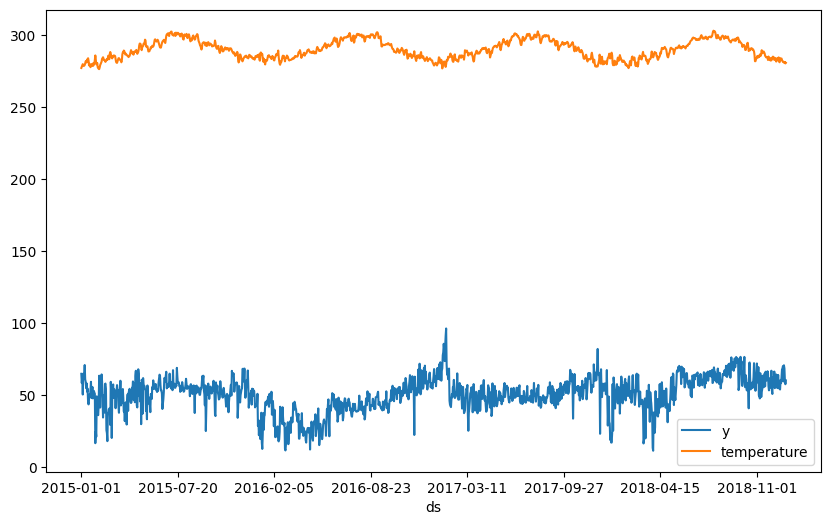

In [2]:
# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial04.csv")
display(df.head())

fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

In [3]:
df

,ds,y,temperature
0,2015-01-01,64.92,277.00
1,2015-01-02,58.46,277.95
2,2015-01-03,63.35,278.83
3,2015-01-04,50.54,279.64
4,2015-01-05,64.89,279.05
...,...,...,...
1456,2018-12-27,70.82,280.67
1457,2018-12-28,68.61,281.15
1458,2018-12-29,60.22,281.11
1459,2018-12-30,57.69,280.14


# Predict aplicado en Iron

Base: Todo esto ya existe en Main Iron

In [4]:
import pandas as pd
import sys
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

#from sklearn import linear_model

import matplotlib.pyplot as plt

import logging

# Configurar el nivel de registro a un valor más alto
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

pd.set_option('display.max_colwidth', 300) # Permite ampliar el ancho de los campos de ser necesario

#from prophet import Prophet
#from prophet.plot import add_changepoints_to_plot

#import sympy as sp
#import itertools
import os

#import random
import numpy as np

#import time

# import train test split
from sklearn.model_selection import train_test_split

In [5]:
dia_predecir_desde = dt.datetime(2024, 1, 1).date()
dia_predecir_hasta = dt.datetime(2024, 12, 31).date()

#dia_predecir_hasta = dt.datetime(2024, 3, 31).date()

hacer_ajuste_eventos = True # Si se realiza un ajuste en los eventos, para normalizarlos
mostrar_graficos = False
año_planificacion = 2024

mode = 'PC'  # PC (personal) o VM (virtual machine)
actualizar = False  # Si las tablas se van a buscar a GSheets (True) o si se rescatan desde Inputs/Rescates (False)

In [6]:
version = 'Iron 1.0' # nombre de la carpeta contendedora
carpeta_input = '../Inputs/'
carpeta_input_generales = '../../Inputs_generales/'
carpeta_modulos = '../../Modulos/'  #/home/data/python/performance_automation/Modulos
carpeta_modulos_propios = '../Modulos/' 
carpeta_resultados = '../Resultados/'

output = True

# Para modo PC
base_dag = f'/home/data/python/performance_automation/{version}/'

reiniciar_resultados = False # Elimina todos los resultados (archivos, no carpetas) de la carpeta Resultados

In [7]:
if mode == 'VM': # Esto tiene que ir en funcion generar dag
    carpeta_modulos = '/home/data/python/performance_automation/Modulos/'
    carpeta_modulos_propios = f'/home/data/python/performance_automation/{version}/Modulos/'
    carpeta_resultados = f'/home/data/python/performance_automation/{version}/Resultados/'

sys.path.insert(0, carpeta_modulos)
import funciones_transversales as tf
#from accounts import accounts_dict

# Ajustar (agr notación para agregados por país)
sys.path.insert(0, carpeta_modulos_propios)
"""
from modulo_neural_prophet_agr_v2 import main_prophet, plotear_test_ecm_conjunto, predict_prophet
from inicializar_agr import generar_tuplas, actualizar_seguimiento
from actualizacion_data_historica_agr import update_dfs
from desarrollo_inicial import lectura_y_actualizacion_metas_ppto, factor_duplicidad_lt_totales
from ajuste_de_metricas import algoritmo_general_ajuste_metricas, validaciones
from extension_otras_duplicidades_v2 import relacion_dias, generar_totales, generar_desagregados, generar_resultados_duplicaciones
from consolidacion_0 import consolidacion_inicial, lectura_metas, generar_metas_duplicaciones, extension_canales_ppto_inicial, extension_canales_ppto, extension_canales_ppto_etapa_2, metas_f1_g1
"""

carpeta_principal = carpeta_modulos_propios[:-8] # Carpeta donde está contenida la versión de NXS2

ModuleNotFoundError: No module named 'funciones_transversales'

In [ ]:
df_dias_eventos = tf.generar_calendario_eventos(carpeta_input, carpeta_input_generales, actualizar) 
df_dias_eventos.head()

In [ ]:
grado_para_RLM = 2  # Grado de curva que describe el manto del train ECM de Prophet, en funcion de sus variables
paises = ['MX'] #['CL', 'PE', 'CO', 'AR', 'UY', 'MX', 'BR']

In [ ]:
version_archivos = "240229_2024"
ajustar_metricas = True 
modo_proyeccion = 'libre' 

In [ ]:
dic_ajustar_metricas = {True: 'Meta_Declarada', False: 'Meta_Iron_libre'}
version_archivos_all = f'{version_archivos}_{dic_ajustar_metricas[ajustar_metricas]}_{modo_proyeccion}'
version_prediccion = f'{version_archivos}_{modo_proyeccion}'

print(version_archivos_all)
print(version_prediccion)

# Nuevo: No existe en Main Iron

In [ ]:
#n_rangos = 20 # PARAMETRO...en cuantos rangos quiero particionar la inversión
ponderador_inv_max = 1.5 # PARAMETRO...Cuantas veces la inversión maxima histórica se permite invertir en un día

# Lo que se hace es particionar en n_rangos, el intervalo [0, inv_max  * ponderador_inv_max]

In [ ]:
duplicacion = 'F-LT' # Paarametro
tabla_data = "sod-corp-plp-beta.ETL_main_2023.Nexus_Main_230829_0_v8"

In [ ]:
df.head() # Solo como ejemplo

## Actualizar data

### Análogo a etapa generar_tuplas

In [ ]:
client = tf.generar_cliente()

In [ ]:
fd = open(f"{carpeta_modulos_propios}sql/BASE_TUPLAS_INVERSION_aux.sql", 'r') # Se lee la query con las tuplas distintas
query = fd.read() 
fd.close()

x = input('Seguro continuar con tabla data v8 y BASE_TUPLAS_INVERSION_aux??')

cambios_query = {'tabla_data': tabla_data, 'duplicacion': duplicacion}

query = tf.replace_query(query = query, dic_args = cambios_query)

df_tuplas_inversion = tf.request_GCP_vnew(nombre_tabla = '', client = client, specific_query = query, project_sandbox = '', modo_query = 'file', output = True)
df_tuplas_inversion = df_tuplas_inversion[df_tuplas_inversion['PAIS'].isin(paises)].reset_index(drop = True)
df_tuplas_inversion_recorrido = df_tuplas_inversion[['PAIS', 'CANAL', 'FUENTE', 'FAMILIA', 'SUBFAMILIA']].drop_duplicates().reset_index(drop = True)
df_tuplas_inversion_recorrido # tuplas que serán recorridas..sin LT, se agrupará después

In [ ]:
df_tuplas_inversion_recorrido = df_tuplas_inversion_recorrido[df_tuplas_inversion_recorrido['FAMILIA'] == '17 - Muebles'].reset_index(drop = True) # SMALL BATCH (ELIMINAR)
df_tuplas_inversion_recorrido


### Análogo a etapa actualizar_seguimiento

In [ ]:
df_agr_inversion = pd.read_csv(f'{carpeta_input}tuplas_inversion.csv', sep = ';') # agrupacion de canal-last touch
df_tuplas = df_tuplas_inversion_recorrido.merge(df_agr_inversion[['CANAL', 'LT_AGR']], on = 'CANAL', how = 'left')
df_tuplas['NOMBRE'] = df_tuplas.apply(lambda x: f"{x['PAIS']}_{x['CANAL']}_{x['FUENTE']}_{x['FAMILIA']}_{x['SUBFAMILIA']}_{x['LT_AGR']}".replace('/', ' '), axis = 1)
df_tuplas_name = df_tuplas.copy()


if 'ITERACIONES' not in df_tuplas_name.columns:
    df_tuplas_name['ITERACIONES'] = 0

if version_prediccion not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/'):
    os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/{version_prediccion}')

# Se reemplazan las iteraciones, por la cantidad de registros en RLM
for i in range(len(df_tuplas_name)):
    #pais, canal, fuente, familia, subfamilia, lt_agr = df_tuplas_name.loc[i, ['PAIS', 'CANAL', 'FUENTE', 'FAMILIA', 'SUBFAMILIA', 'LT_AGR']]
    name = df_tuplas_name['NOMBRE'][i]
    if f'{name}.pkl' not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/{version_prediccion}/'):
        df_tuplas_name.loc[i, 'ITERACIONES'] = 0
    else:
        #print('actualizar_seguimiento, si existe', len(tf.pickle_act(f'{carpeta_resultados}pickles/RLM/{name}')))
        df_tuplas_name.loc[i, 'ITERACIONES'] = len(tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/{version_prediccion}/{name}'))

if version_prediccion not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/'):
    os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/{version_prediccion}')

if 'df_seguimiento.csv' not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/{version_prediccion}/'): # Se crea df seguimiento si no existe
    df_seguimiento = pd.DataFrame()
else: # Se lee df_seguimiento
    df_seguimiento = pd.read_csv(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/{version_prediccion}/df_seguimiento.csv', sep = ';', decimal = ',')

df_seguimiento = pd.concat([df_tuplas_name, df_seguimiento]).drop_duplicates(subset = ['NOMBRE']).reset_index(drop = True)

df_seguimiento['ITERACIONES'] = df_seguimiento['ITERACIONES'].fillna(0).astype(int)
df_seguimiento.to_csv(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/{version_prediccion}/df_seguimiento.csv', index = False, sep = ';', decimal = ',')

df_tuplas = df_tuplas.merge(df_seguimiento[['NOMBRE', 'ITERACIONES']], on = 'NOMBRE', how = 'left').reset_index(drop = True)
df_tuplas

In [ ]:
df_tuplas = df_tuplas.sort_values(by = 'ITERACIONES') # conexion A

In [ ]:
import tqdm

In [ ]:
def obtener_max_date_inversion(tf, tabla_data, client): # Se determina el máximo día en la tabla que concentra toda la data historica
    query_max_date = f'select max(DATE) as DATE from `{tabla_data}`'

    df_max_date =  tf.request_GCP_vnew(
        nombre_tabla = "",
        specific_query = query_max_date,
        client = client,
        output = False, permitir_fallos = False)

    df_max_date['DATE'] = pd.to_datetime(df_max_date['DATE'])
    max_date = df_max_date['DATE'][0]
    return max_date

def request_df_inversion(tf, actualizar_df, name, client, carpeta_resultados, tabla_data): # Actualización el 16 y 17 de enero, para corregir orgánicos en MX, BR y AR el oct-dic 2023 (solo para tabla v4 sist original)
    
    graficar = False
    
    if not actualizar_df:
        return None
    
    [pais, canal, fuente, familia, subfamilia] = name.split('_')
 
    # Se genera el detalle de la query
    
    # Ajustar query cuando tabla sea la versión de NXS2
    
    fd = open(f"{carpeta_modulos_propios}/sql/BASE_INVERSION.sql", 'r') # Se lee la query
    query = fd.read() 
    fd.close()
    
    cambios_query = {'tabla_data': tabla_data, 'duplicacion': duplicacion, 'pais': pais, 'canal': canal, 'fuente': fuente, 'familia': familia, 'subfamilia': subfamilia}
    query_tupla = tf.replace_query(query = query, dic_args = cambios_query)
    df = tf.request_GCP_vnew(nombre_tabla = '', client = client, specific_query = query_tupla, project_sandbox = '', modo_query = 'file', output = True)

    df['DATE'] = pd.to_datetime(df['DATE'])
    tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/dfs_data/{name}', variable = df, mode = 'save') # Se guarda la actualizacion
    return None

def update_dfs_inversion(tf, df_tuplas_inversion_recorrido, carpeta_resultados, tabla_data, client):
    
    ejecutar_dias = [''] #['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes']
    
    dic_dias = {0: 'Lunes', 1: 'Martes', 2: 'Miercoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sabado', 6: 'Domingo'}
    # Ejecutar solo si día de la semana es de lunes a viernes
    today = dt.datetime.now().date()
    weekday = today.weekday()
    weekday_name = dic_dias[weekday]
    if weekday_name not in ejecutar_dias:
        print(f'Los días {weekday_name} no se actualiza con los nuevos días')
        print('Actualmente, se actualizan los días: ', ejecutar_dias)
        return None
    
    print('Obtener max date')
    max_date = obtener_max_date_inversion(tf, tabla_data, client)
    
    set_names_df = set()
    for i in range(len(df_tuplas_inversion_recorrido)):
        pais, canal, fuente, familia, subfamilia = df_tuplas_inversion_recorrido.loc[i, ['PAIS', 'CANAL', 'FUENTE', 'FAMILIA', 'SUBFAMILIA']]
        name = f'{pais}_{canal}_{fuente}_{familia}_{subfamilia}'.replace('/', ' ')
        set_names_df.add(name)
    
    list_names_df = list(set_names_df)
    #print(list_names_df)
    #sys.exit()
    
    for name in tqdm.tqdm(list_names_df):
        #name = df_tuplas['NOMBRE'][i]
        #name = name.split('_')[:3] + [name.split('_')[4]] # Se elimina el grado para el caso de df, y tambien se elimina la métrica (se extraen visitas, ordenes y venta colocada)
        #name = '_' .join(name)
        
        #print(name)
        
        actualizar_df = False
        if f'{name}.pkl' in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/dfs_data/'):
            #print('ENCONTRADO')
            df = tf.pickle_act(file_name = f'{carpeta_resultados}Inversion/{duplicacion}/dfs_data/{name}')
            max_date_df = df['DATE'].max()
            if max_date_df < max_date:
                actualizar_df = True
        else:
            actualizar_df = True
        
        #print('actualizar_df', actualizar_df)
        
        request_df_inversion(tf, actualizar_df, name, client, carpeta_resultados, tabla_data) # Si se actualiza, entonces se hace el request a GCP
        #sys.exit('Exportacion OK. Continuar ejecución abajo [Main Prophet]')
    return max_date

In [ ]:
max_date = update_dfs_inversion(tf, df_tuplas_inversion_recorrido, carpeta_resultados, tabla_data, client)
max_date
# OK hasta acá

## Main Prophet

In [ ]:
"""
# tuplas inicial
if 'seguimiento_train.csv' not in os.listdir(f'{carpeta_resultados}/Inversion/{duplicacion}'):
    df_tuplas_inversion_recorrido['ITERACIONES'] = 0
    df_tuplas_inversion_recorrido.to_csv(f'{carpeta_resultados}/Inversion/{duplicacion}/seguimiento_train.csv', sep = ';', index = False)
else:
    df_tuplas_inversion_recorrido_new = pd.read_csv(f'{carpeta_resultados}/Inversion/{duplicacion}/seguimiento_train.csv', sep = ';')
    df_tuplas_inversion_recorrido_new = df_tuplas_inversion_recorrido_new.fillna("")
    df_tuplas_inversion_recorrido = df_tuplas_inversion_recorrido.merge(df_tuplas_inversion_recorrido_new, on = ['PAIS', 'CANAL', 'FUENTE', 'FAMILIA', 'SUBFAMILIA'], how = 'left')
    df_tuplas_inversion_recorrido['ITERACIONES'] = df_tuplas_inversion_recorrido['ITERACIONES'].fillna(0)
"""

In [ ]:
#sys.exit()

In [ ]:
#df_tuplas_inversion_recorrido.head()

In [ ]:
#df_tuplas_inversion_recorrido = df_tuplas_inversion_recorrido[df_tuplas_inversion_recorrido['FAMILIA'] == ]

In [ ]:
# SMALL BATCH (ELIMINAR 3)
#df_tuplas_inversion_recorrido = df_tuplas_inversion_recorrido[df_tuplas_inversion_recorrido['PAIS'] == 'UY'] 
#df_tuplas_inversion_recorrido = df_tuplas_inversion_recorrido[df_tuplas_inversion_recorrido['FAMILIA'] == 'Unspecified'].reset_index(drop = True)


In [ ]:
prophet_min_iteraciones_inversion = 2 # min de iteraciones que requiere cada tupla para terminar train 
n_iters_inversion = 2 # PARAMETRO..cuantas ejecuciones se hacen antes de pasar a la siguiente tupla (rotación)
output_prophet = False # True
etapa = "Train_Inversion"
plotear_evolucion_ecm_inversion = True # Si despues de terminar train
learning_rate_inversion = 100
n_epochs_inversion = 5 # Cuantos epochs incluye cada iteración
test_size = 0.2

In [ ]:
df_agr_inversion = pd.read_csv(f'{carpeta_input}/tuplas_inversion.csv', sep = ';') # agrupacion de canal-last touch
df_agr_inversion = df_agr_inversion[df_agr_inversion['LAST_TOUCH_CHANNEL'].notna()]
df_tuplas_inversion = df_tuplas_inversion.merge(df_agr_inversion, on = ['CANAL', 'LAST_TOUCH_CHANNEL'], how = 'left')
df_tuplas_inversion['LT_AGR'] = df_tuplas_inversion['LT_AGR'].fillna(df_tuplas_inversion["CANAL"] + '_Otros')
df_tuplas_inversion

In [ ]:
def generar_histograma_inversion(df, carpeta_resultados, name):
    metrica = list(set(df.columns) - {'DATE'})
    
    for i in range(len(metrica)):
        #print('metrica generar_histograma', metrica[i])
        # Crea una tabla de frecuencias con 10 bins
        # Crear una tabla de frecuencia con 10 bins y almacenar los resultados en un nuevo DataFrame
        tabla_frecuencia = pd.DataFrame(pd.cut(df[metrica[i]], bins = 10).value_counts().sort_index())

        # Imprimir el DataFrame de la tabla de frecuencia
        tabla_frecuencia['intervalo'] = tabla_frecuencia.index
        tabla_frecuencia = tabla_frecuencia.reset_index(drop = True)
        tabla_frecuencia['INFERIOR'] = tabla_frecuencia['intervalo'].apply(lambda x: x.left)
        tabla_frecuencia['SUPERIOR'] = tabla_frecuencia['intervalo'].apply(lambda x: x.right)
        tabla_frecuencia['MARCA DE CLASE'] = tabla_frecuencia['intervalo'].apply(lambda x: x.mid)
        tabla_frecuencia =  tabla_frecuencia.drop(columns = ['intervalo'])
        tabla_frecuencia = tabla_frecuencia.rename(columns = {metrica[i]: 'FRECUENCIA'})
        tabla_frecuencia['ID_INTERVALO'] = tabla_frecuencia.index + 1
        tabla_frecuencia['FRECUENCIA RELATIVA'] = tabla_frecuencia['FRECUENCIA'] / tabla_frecuencia['FRECUENCIA'].sum()
        tabla_frecuencia = tabla_frecuencia[['ID_INTERVALO', 'INFERIOR', 'SUPERIOR', 'MARCA DE CLASE', 'FRECUENCIA', 'FRECUENCIA RELATIVA']]
        tabla_frecuencia['FRECUENCIA RELATIVA ACUMULADA'] = tabla_frecuencia['FRECUENCIA RELATIVA'].cumsum()
        tabla_frecuencia[['INFERIOR', 'SUPERIOR', 'MARCA DE CLASE', 'FRECUENCIA RELATIVA', 'FRECUENCIA RELATIVA ACUMULADA']] = tabla_frecuencia[['INFERIOR', 'SUPERIOR', 'MARCA DE CLASE', 'FRECUENCIA RELATIVA', 'FRECUENCIA RELATIVA ACUMULADA']].astype(float)
        tabla_frecuencia.to_csv(f'{carpeta_resultados}histogramas_metricas_reales/Inversion/tablas_frecuencias/{name}_{metrica[i]}.csv', index = False, sep = ';', decimal = ',')

        
        # Generar un histograma con las visitas, con plot...en el eje y, mostrar la frecuencia %
        
        #plt.figure(figsize = (10, 5))
        plt.hist(df[metrica[i]], bins = 10, density = True)
        plt.tight_layout()
        # muestra la leyenda
        
        plt.savefig(f'{carpeta_resultados}histogramas_metricas_reales/Inversion/graficos/{name}_{metrica[i]}.jpg')
        plt.close()
        plt.show()
    return None

In [ ]:
def inicializar_inversion(tf, carpeta_input, name, carpeta_resultados, df_dias_eventos, version_prediccion):
    
    #print(f'{name}.pkl', f'{carpeta_resultados}Inversion/{duplicacion}/pickles/variables/{version_prediccion}/')
    if f'{name}.pkl' in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/variables/{version_prediccion}/'):
        #print('ENCONTRADO')
        df_variables = tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/variables/{version_prediccion}/{name}', mode = 'open')
    else:
        #print('NO ENCONTRADO')
        df_variables = pd.read_csv(f'{carpeta_input}Prophet_config_inicial_neural.csv', sep = ';', decimal = ',') # Por ahora, este df se va pickleando
    
    if (version_prediccion in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/errores/')) and (f'{name}.pkl' in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/errores/{version_prediccion}/')):
        best_global_ecm = tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/errores/{version_prediccion}/{name}', mode = 'open')
    else:
        best_global_ecm = float('inf')
    
    #print('ERROR', best_global_ecm)
    
    #display('df_variables')
    #display(df_variables)
    
    
    pais = name.split('_')[0]
    
    #print('NAME', name, pais)
    df_dias_eventos_pais = df_dias_eventos[df_dias_eventos['PAIS'] == pais].reset_index(drop = True)
    df_holidays = create_df_holidays(df_dias_eventos_pais)
    
    #display(df_holidays)
    #sys.exit('Salida en funcion inicializar_inversion')
            
    return df_variables, best_global_ecm, df_holidays

In [ ]:
def create_df_holidays(df_dias_eventos):
    df_holidays = df_dias_eventos[['EVENTO', 'DATE']].rename(columns = {'EVENTO': 'event', 'DATE': 'ds'})
    #df_holidays['lower_window'] = 0
    #df_holidays['upper_window'] = 0
    return df_holidays

In [ ]:
import itertools
import sympy as sp

def create_math_model(df_variables, grado_para_RLM):
    dic_names = {}
    var_list = []


    for i in range(len(df_variables)):
        parametro, representacion = df_variables['PARAMETRO'][i], df_variables['REPRESENTACION'][i]
        var_list.append(sp.Symbol(representacion))
        dic_names[sp.Symbol(representacion)] = parametro

    df_funcion_error = pd.DataFrame()
    for i in list(itertools.combinations_with_replacement(var_list, grado_para_RLM)): # Producto cruz de las variables, para hacer tuplas de tamaño (grado)
        termino = 1
        for g in i:
            termino *= g
        
        #print(termino)

        beta = sp.Symbol(f'Beta({termino})') 
        df_new = pd.DataFrame({'TERMINO': [termino], 'BETA': [beta]})
        df_funcion_error = pd.concat([df_funcion_error, df_new])

    funcion_error = (df_funcion_error['TERMINO'] * df_funcion_error['BETA']).sum()
    return df_funcion_error, funcion_error

In [ ]:
def calculate_derivatives(df_variables, funcion_error):
    df_variables['DERIVADA'] = df_variables['REPRESENTACION'].apply(lambda x: sp.diff(funcion_error, sp.Symbol(x)))
    return df_variables
    #display(df_variables)

In [ ]:
def inicializar_RLM_inversion(tf, df_funcion_error, carpeta_resultados, name, version_prediccion, duplicacion):
    
    campos_para_RLM = list(df_funcion_error['TERMINO'].unique())
    
    if version_prediccion not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/'): # se crea la carpeta si no existe
        os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/{version_prediccion}')
    if f'{name}.pkl' in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/{version_prediccion}'):
        df_RLM = tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/{version_prediccion}/{name}', mode = 'open')
    else:
        df_RLM = pd.DataFrame(columns = campos_para_RLM + ['ECM_real'])
        
    return df_RLM

In [ ]:
def eliminar_outliers(df_model, df_holidays, dia_predecir_desde, beta = 0.05):
    
    dia_predecir_desde_datetime = dt.datetime.strptime(str(dia_predecir_desde), '%Y-%m-%d')
    
    #print('Eliminar outliers')
    #display(df_model)
    
    df_model_post_predict = df_model[df_model['ds'] >= dia_predecir_desde_datetime].reset_index(drop = True)
    df_model = df_model[df_model['ds'] < dia_predecir_desde_datetime].reset_index(drop = True)
    #print('dia_predecir_desde', dia_predecir_desde_datetime)
    
    
    df_model_sin_evento = df_model.merge(df_holidays, how = 'left', on = 'ds')
    df_model_sin_evento['event'] = df_model_sin_evento['event'].fillna('Sin evento')

    df_model_sin_evento = df_model_sin_evento[df_model_sin_evento['event'] == 'Sin evento']
    
    #print('Model sin evento', len(df_model_sin_evento))
    
    # Elimina el 100 * beta % menor de los datos
    df_model_sin_evento = df_model_sin_evento[df_model_sin_evento['y'] > df_model_sin_evento['y'].quantile(beta)]
    #print('Model sin evento', len(df_model_sin_evento))
    # Elimina el 100 * beta % mayor de los datos
    df_model_sin_evento = df_model_sin_evento[df_model_sin_evento['y'] < df_model_sin_evento['y'].quantile(1 - beta)]
    #print('Model sin evento', len(df_model_sin_evento))
    df_model_sin_evento = df_model_sin_evento[['ds']]
    df_model_sin_evento['Incluir'] = True
    
    df_model = df_model.merge(df_model_sin_evento, how = 'left', on = 'ds')
    df_model['Incluir'] = df_model['Incluir'].fillna(False)
    
    #display('df_model0')
    #display(df_model)
    
    df_holidays.to_csv('df_holidays.csv', index = False, sep = ';', decimal = ',')
    #df_model.to_csv('df_model_A.csv', index = False, sep = ';', decimal = ',')
    df_model = df_model.merge(df_holidays, how = 'left', on = 'ds')
    #df_model.to_csv('df_model_B.csv', index = False, sep = ';', decimal = ',')
    df_model['event'] = df_model['event'].fillna('Sin evento')
    #sys.exit()
    
    #display('df_model1')
    #display(df_model)
    
    #df_model.to_csv('df_model_eliminar_outliers.csv', index = False, sep = ';', decimal = ',')
    df_model = df_model[(df_model['Incluir']) | (df_model['event'] != 'Sin evento')].reset_index(drop = True) # Todos los Incluir = False & Sin evento -> Se excluyen
    #print('Len final', len(df_model))
    df_model = df_model[['ds', 'y', 'inversion']]
    
    #display('df_model2')
    #display(df_model)
    
    df_model = pd.concat([df_model, df_model_post_predict]).reset_index(drop = True)
    #sys.exit('Revisar')
    
    #display(df_model)
    #sys.exit('Revisar eliminar outliers')
    
    return df_model

In [ ]:

def show_x0(df_variables, n_iter, output_prophet, best_global_ecm):   
    if output_prophet:
        print(f'# {n_iter}:  ', end = '')
    
    #display(df_variables)
    
    for i in range(len(df_variables)):
        v = df_variables['PARAMETRO'][i]
        tipo = df_variables['TIPO'][i]
        if tipo == 'float':
            actual = float(df_variables['ACTUAL'][i])
            value = "{:.3e}".format(actual)
        else:
            actual = int(df_variables['ACTUAL'][i])
            # value tiene que ser actual, con dos digitos siempre, y sin decimales
            value = "{:02d}".format(actual)
        if output_prophet:
            print(f"{v}: {value}", end = ' | ')
    
    if output_prophet:
        print(f'BEST_ECM: {"{:.3e}".format(best_global_ecm)}', end = ' | ')
        
    #print('')
    #sys.exit('Salida en show x0')
    return None

In [ ]:
def run_prophet(df_variables):
    
    #df.to_csv('df_rev_cota_min.csv', index = False, sep = ';', decimal = ',')
    

    #df = df[df[metrica] > 0].reset_index(drop = True)

    #display('df_variables')
    #display(df_variables)
    
    dic_variables_names = df_variables[['PARAMETRO', 'ACTUAL']].set_index('PARAMETRO').to_dict()['ACTUAL']
    dic_variables_values = df_variables[['REPRESENTACION', 'ACTUAL']].set_index('REPRESENTACION').to_dict()['ACTUAL']
    dic_variables_tipos = df_variables[['PARAMETRO', 'TIPO']].set_index('PARAMETRO').to_dict()['TIPO']
    
    for v in dic_variables_names:
        if dic_variables_tipos[v] == 'int':
            dic_variables_names[v] = int(dic_variables_names[v])

    #lower_p, upper_p = dic_variables_names['LOWER_P'], dic_variables_names['UPPER_P']

    #if upper_p <= lower_p:
    #    upper_p = lower_p + 1
        
    #cota_min = calcula_percentil(df, lower_p, mostrar = False)
    #cota_max = calcula_percentil(df, upper_p, mostrar = False)

    #df_variables.loc[df_variables['PARAMETRO'] == 'UPPER_P', 'ACTUAL'] = upper_p
    dic_variables_names = df_variables[['PARAMETRO', 'ACTUAL']].set_index('PARAMETRO').to_dict()['ACTUAL']
    dic_variables_values = df_variables[['REPRESENTACION', 'ACTUAL']].set_index('REPRESENTACION').to_dict()['ACTUAL']

    
    #df_model['floor'], df_model['cap'] = cota_min, cota_max
    return dic_variables_names, dic_variables_values

In [ ]:
def hacer_prediccion_inversion(tf, model, df_model, df_holidays, dia_predecir_hasta, carpeta_resultados, name, alpha, modo_proyeccion, version_prediccion, ponderador_inv_max, n_rangos = 0, etapa_prediccion = False):
    
    # ponderador_inv_max: Hasta cuantas veces la inversión máxima histórica se permite
    
    df_model_0 = df_model.copy().reset_index(drop = True)

    #[pais, metrica, nat_medio, grado] = name.split('_')
    
    ajustar_forecast = True
    #if (f'{metrica}_{nat_medio}' == 'VISITAS_PAGO'):
    #    print('Visitas pago no requiere pendiente no negativa!!\n\n\n\n')
    #    ajustar_forecast = False    
    #print('Hacer prediccion')

    #print('hacer_prediccion_inversion')


    df_model_0 = df_model_0.drop_duplicates(subset = ['ds']).reset_index(drop = True)
    #df_model_0.to_csv('1_0_df_model_0.csv', index = False, sep = ';', decimal = ',')
    df_model_0 = model.create_df_with_events(df_model_0, df_holidays)
    
    for c in list(set(df_model_0.columns) - {'ds'}):
        df_model_0[c] = df_model_0[c].astype('float64')
    
    #df_model_0.to_csv('1_1_df_model_0.csv', index = False, sep = ';', decimal = ',')
    
    ultimo_dia_actual = df_model_0['ds'].max()
    # convertir a datetime
    ultimo_dia_actual = dt.datetime.strptime(str(ultimo_dia_actual), '%Y-%m-%d %H:%M:%S').date()

    
    delta_days = (dia_predecir_hasta - ultimo_dia_actual).days + 1
    #print('Aqui corregir perdiods = 1000')
    #print(ultimo_dia_actual, type(ultimo_dia_actual), dia_predecir_hasta, type(dia_predecir_hasta), 'DELTA', delta_days)
    
    #display('df_model_0 antes de make_future_dataframe D')
    #display(df_model_0.head())
    #display(df_model_0.tail())
    #df_model_0.to_csv('INVdf_model_0.csv', index = False, sep = ';', decimal = ',')
    #print('delta_days', delta_days)
    
    df_model_0_max_date = df_model_0['ds'].max() + dt.timedelta(days = 1)
    df_future_regressors = pd.DataFrame({'ds': pd.date_range(start = df_model_0_max_date, end = dia_predecir_hasta + dt.timedelta(days = 1), freq = 'D')}) # crea un df con el campo ds, con los dias desde df_model_0_max_date hasta dia_predecir_hasta
    df_future_regressors['inversion'], df_future_regressors['kernel'] = 0, 0 # Para etapa train (no afecta ni hace nada, solo se requiere como input en make_future_dataframe)
    
    #display('df_future_regressors')
    #display(df_future_regressors)
    
    if not etapa_prediccion:
        #display('df_model_0', 'nrangos', n_rangos)
        #display(df_model_0)
        #print('Exportacion de df_model_0')
        df_model_0.to_csv('df_model_0.csv', index = False, sep = ';', decimal = ',')
        
        # (comentado el 240409)
        """
        #inv_max = df_model_0['inversion'].max()
        for i in range(1, n_rangos + 1):
            #inversion_L = inv_max * (i - 1) / n_rangos
            #inversion_U = inv_max * i / n_rangos
            #if i == 1:
            #    df_model_0[f'R_inv{i}'] = np.where(df_model_0[f'inversion'] <= inversion_U, df_model_0[f'inversion'], 0)
            #else:
            #    df_model_0[f'R_inv{i}'] = np.where((df_model_0[f'inversion'] > inversion_L) & (df_model_0[f'inversion'] <= inversion_U), df_model_0[f'inversion'], 0)
            df_future_regressors[f'R_inv{i}'] = 0 # Para etapa train
        
        df_future_regressors.to_csv('df_future_regressors.csv', index = False, sep = ';', decimal = ',')
        df_future = model.make_future_dataframe(df_model_0, df_holidays, n_historic_predictions = True, periods = 0, regressors_df = df_future_regressors)
        """
        #display('df_future')
        #display(df_future)
        #df_future.to_csv('df_future.csv', index = False, sep = ';', decimal = ',')
        #sys.exit('Revisar df future...rangos de future regressor')
        
    else:
        #display('df_model_0')
        #display(df_model_0)
        #M240410
        df_model_0['EVENTO'] = df_model_0[list(set(df_model_0.columns) - {'y', 'ds', 'inversion'})].sum(axis = 1)
        df_model_0.to_csv('df_model0 para prediccion.csv', index = False, sep = ';', decimal = ',')
        # Continuar aqui
        dic_parametros = tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/parametros_kernel/{name}') # Se leen los parámetros del kernel
        #print(dic_parametros)
        #df_model_0 = agregar_tramos_inversion(model, df_model_0, train = False)
        
        #df_model_0.to_csv('df_model0 para prediccion_v2.csv', index = False, sep = ';', decimal = ',')
        
        inv_max = df_model_0['inversion'].max() * ponderador_inv_max
        
        forecast_all = pd.DataFrame()
        for i in tqdm.tqdm(range(1, n_rangos + 1)):
            inversion = inv_max * i / n_rangos
            df_future_regressors[f'inversion'] = inversion
            df_future_regressors[f'kernel'] = dic_parametros['A'] * (inversion ** dic_parametros['k']) + dic_parametros['h']
            df_future = model.make_future_dataframe(df_model_0, df_holidays, n_historic_predictions = True, periods = delta_days, regressors_df = df_future_regressors)
            df_future = df_future[df_future['ds'].notna()].reset_index(drop = True)
            #df_future.to_csv(f'INVdf_future_{i}.csv', index = False, sep = ';', decimal = ',')
            df_future = df_future.drop(columns = 'EVENTO')
            forecast_original = model.predict(df_future)  # Aqui predict
            forecast = forecast_original.copy()
            forecast['ds'] = pd.to_datetime(forecast['ds']).dt.date
            forecast['RANGO'] = i
            forecast['INVERSION'] = inversion
            forecast_all = pd.concat([forecast_all, forecast])
        return forecast_all, forecast_all
        """
        campos_rangos = list(set(df_model_0.columns) - {'ds', 'y',  'inversion', 'Hard Sell', 'Festividad', 'EVENTO'})
        forecast_all = pd.DataFrame()
        for rango, c in enumerate(campos_rangos):
            df_model_0_rango = df_model_0.copy()
            
            inversion = df_model_0_rango[c].max()
            
            print('inversion', c, inversion)
            #df_model_0_rango['inversion'] = inversion
            #df_model_0_rango[c] = inversion
            df_future_regressors['inversion'] = inversion
            df_future_regressors[c] = inversion
            for c2 in campos_rangos:
                if c == c2:
                    continue
                #df_model_0_rango[c2] = 0
                df_future_regressors[c2] = 0
            
            df_future = model.make_future_dataframe(df_model_0_rango, df_holidays, n_historic_predictions = True, periods = delta_days, regressors_df = df_future_regressors)
            df_future['inversion'] = inversion
            df_future[c] = inversion
            
            for c2 in campos_rangos:
                if c == c2:
                    continue
                #df_model_0_rango[c2] = 0
                df_future[c2] = 0
            
            df_future = df_future[df_future['ds'].notna()].reset_index(drop = True)
            #df_future.to_csv(f'0INVdf_future_{c}.csv', index = False, sep = ';', decimal = ',')
            df_future = df_future.drop(columns = 'EVENTO')
            forecast = model.predict(df_future)  # Aqui predict
            forecast['ds'] = pd.to_datetime(forecast['ds']).dt.date
            forecast['RANGO'] = rango
            forecast['INVERSION'] = inversion
            #forecast.to_csv(f'0INVforecast_{c}.csv', index = False, sep = ';', decimal = ',')
            forecast_all = pd.concat([forecast_all, forecast])
            
            #display(forecast)
            

        """
        #sys.exit('Revisar df_model0 para prediccion.csv, incluir los future regressors igual que en la creacion del modelo? Hacer función?')

        

        
        sys.exit('Stop: Iterar en rangos')
        #df_future_regressors['inversion'] = 0 # Para etapa train
        #df_future = model.make_future_dataframe(df_model_0, df_holidays, n_historic_predictions = True, periods = 0, regressors_df = df_future_regressors)
        #df_future = model.make_future_dataframe(df_model_0, df_holidays, n_historic_predictions = True, periods = delta_days, regressors_df = df_future_regressors)
        
    #df_future = df_future[df_future['ds'].notna()].reset_index(drop = True)
    #df_future.to_csv('INVdf_future.csv', index = False, sep = ';', decimal = ',')
    
    #forecast_original = model.predict(df_future)  # Aqui predict (comentado el 240409)
    forecast_original = model.predict(df_model_0) # Aqui predict (aparece el 240409)
    forecast = forecast_original.copy()
    forecast['ds'] = pd.to_datetime(forecast['ds']).dt.date
    
    #forecast.to_csv('1_2_forecastALL_inversion.csv', index = False, sep = ';', decimal = ',')
    #sys.exit('Hacer prediccion (revisar 1_2_forecastALL_inversion.csv)')
    
    #print('modo proyeccion', modo_proyeccion)
    #if (modo_proyeccion == 'presupuesto') and ajustar_forecast:
    #    forecast = corregir_forecast(forecast, min_delta_trend = 0)
    
    #dia_corregido = forecast['ds'].max()
    
    #print('dia corregido', dia_corregido, dia_predecir_hasta)
    
    #print('etapa prediccion', etapa_prediccion)
    #if etapa_prediccion:
    #    return forecast, forecast_original
    #forecast['y'] = forecast['y'].fillna(forecast['yhat1'])
    #df_model_0 = forecast[['ds', 'y', 'yhat1', 'event_Festividad', 'event_Hard Sell']]
    #forecast.to_csv('Adf_model_0.csv', index = False, sep = ';', decimal = ',')
    #print('Revisar Adf_model_0')
    df_model_0 = forecast[['ds', 'yhat1', 'event_Festividad', 'event_Hard Sell', 'future_regressor_inversion', 'future_regressor_kernel']].rename(columns = {'yhat1': 'y', 'event_Festividad': 'Festividad', 'event_Hard Sell': 'Hard Sell'})
    df_model_0 = df_model_0[df_model_0['ds'] <= dia_predecir_hasta].reset_index(drop = True)
    #df_model_0.to_csv('df_model_0_forecast.csv', index = False, sep = ';', decimal = ',')
    """
    tf.pickle_act(f'{carpeta_resultados}pickles/all_predicts/{version_prediccion}/{name}', variable = df_model_0, mode = 'save') # Se guarda el resultado completo
    """
    
    return df_model_0, forecast


In [ ]:
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet import save as model_save
from neuralprophet import load as model_load

In [ ]:
import logging
logging.basicConfig(level=logging.ERROR)

In [ ]:

#display(df_model)

def particion_train_test(df_model, test_size):
    
    n_test = int(len(df_model[df_model['EVENTO'] == 0]) * test_size)
    n_test # datos de testeo aprox que se requieren

    df_model['TIPO_DATO'] = np.where(df_model['EVENTO'] > 0, 'TRAIN', '')
    dic_es_evento = {True: 1, False: 0}

    for c in list(set(df_model.columns) - {'ds', 'y', 'inversion', 'Hard Sell', 'Festividad', 'EVENTO', 'TIPO_DATO', 'RANDOM'}):
        #print(c)
        df_c = df_model[df_model[c] > 0]
        
        #print(c, len(df_c))
        
        if len(df_c) == 1:
            df_model['TIPO_DATO'] = np.where(df_model['TIPO_DATO'] == 'TRAIN', 'TRAIN', np.where(df_model[c] > 0, 'TRAIN', ''))
            #display(df_model[df_model[c] > 0])
        
        else:
            es_evento = False
            if 'evento' in c:
                es_evento = True
            
            #print('es_evento', es_evento)
            
            condicion = (df_model[c] > 0) & (df_model['TIPO_DATO'] == 'TRAIN') & (df_model['EVENTO'] <= dic_es_evento[es_evento])
            condicion_compl = (df_model[c] > 0) & (df_model['TIPO_DATO'] == '') & (df_model['EVENTO'] <= dic_es_evento[es_evento])
            L = len(df_model[condicion])
            while L == 0:
                
                L_comp = len(df_model[condicion_compl]) 
                #print('L y Lcomp', L, L_comp)
                df_model['RANDOM'] = np.random.rand(len(df_model)) #np.where(condicion, np.random.rand(len(df_model)), 1)
                criterio = len(df_model[condicion_compl & (df_model['RANDOM'] <= 1 / L_comp)])
                if criterio > 0:
                    df_model['TIPO_DATO'] = np.where(df_model['TIPO_DATO'] == 'TRAIN', 'TRAIN', np.where((df_model['RANDOM'] <= 1 / L_comp) & condicion_compl, 'TRAIN', ''))
                    df_model = df_model.drop(columns = 'RANDOM')
                    break
    df_model_cuenta = df_model[['TIPO_DATO', 'ds']].groupby(['TIPO_DATO'], as_index = False).count()
    df_model_cuenta

    datos_blancos = df_model_cuenta[df_model_cuenta['TIPO_DATO'] == ''].reset_index(drop = True)['ds'][0]
    ratio = n_test / datos_blancos

    df_model['RANDOM'] = np.random.rand(len(df_model))
    df_model['TIPO_DATO'] = np.where(df_model['TIPO_DATO'] == '', np.where(df_model['RANDOM'] <= ratio, 'TEST', 'TRAIN'), df_model['TIPO_DATO'])
    df_model = df_model.drop(columns = 'RANDOM')
    
    df_train, df_test = df_model[df_model['TIPO_DATO'] == 'TRAIN'], df_model[df_model['TIPO_DATO'] == 'TEST']
    df_train = df_train.drop(columns = 'TIPO_DATO')
    df_test = df_test.drop(columns = 'TIPO_DATO')
    

    return df_model, df_train, df_test




In [ ]:
"""
def agregar_tramos_inversion(model, df_model, train = True):
    
    inv_max_evento = df_model[df_model['Hard Sell'] == 1]['inversion'].max()
    inv_max_no_evento = df_model[df_model['Hard Sell'] == 0]['inversion'].max()
    
    lista_tramos, lista_tramos_eventos = [], []
    for i in range(1, n_rangos + 1):
        lista_tramos.append(inv_max_no_evento * i / n_rangos)
        
    if inv_max_evento > inv_max_no_evento:
        for i in range(1, n_rangos + 1):
            lista_tramos_eventos.append(inv_max_no_evento + (inv_max_evento - inv_max_no_evento) * i / n_rangos)
    else:
        None # lista_tramos_eventos se mantiene vacía
        

    #inv_max = df_model['inversion'].max()
    future_regressor_list = []
    inversion_L = 0
    for i, inversion_U in enumerate(lista_tramos):
        #inversion_L = inv_max * (i - 1) / n_rangos
        #inversion_U = inv_max * i / n_rangos
        if i == 0:
            df_model[f'R_inv{i}'] = np.where(df_model[f'inversion'] <= inversion_U, df_model[f'inversion'], 0)
        else:
            df_model[f'R_inv{i}'] = np.where((df_model[f'inversion'] > inversion_L) & (df_model[f'inversion'] <= inversion_U), df_model[f'inversion'], 0)
        #print('Agregando future regressor', f'R_inv{i}')
        
        if df_model[f'R_inv{i}'].sum() > 0:
            if train:
                model.add_future_regressor(f'R_inv{i}')
            future_regressor_list.append(f'R_inv{i}')
        else:
            df_model = df_model.drop(columns = f'R_inv{i}')
        inversion_L = inversion_U
    
    for i, inversion_U in enumerate(lista_tramos_eventos):
        #inversion_L = inv_max * (i - 1) / n_rangos
        #inversion_U = inv_max * i / n_rangos
        #if i == 0:
        #    df_model[f'R_inv_evento{i}'] = np.where(df_model[f'inversion'] <= inversion_U, df_model[f'inversion'], 0)
        #else:
        df_model[f'R_inv_evento{i}'] = np.where((df_model[f'inversion'] > inversion_L) & (df_model[f'inversion'] <= inversion_U), df_model[f'inversion'], 0)
        #print('Agregando future regressor', f'R_inv_evento{i}')
        
        if df_model[f'R_inv_evento{i}'].sum() > 0:
            if train:
                model.add_future_regressor(f'R_inv_evento{i}')
            future_regressor_list.append(f'R_inv_evento{i}')
        else:
            df_model = df_model.drop(columns = f'R_inv_evento{i}')
        inversion_L = inversion_U
    
    return df_model
"""
    

In [ ]:
def run_epochs_inversion(n, tf, n_epochs, df_model_base_0, df_variables, dic_variables_names, best_global_ecm, test_size, df_holidays, carpeta_resultados, name, output_prophet, dia_predecir_hasta, n_iteraciones_actuales, modo_proyeccion, version_prediccion, ponderador_inv_max):
        
    alpha = 0.01
    
    #sys.exit('Entrada a run_epochs_inversion')
    # Parámetros sensibilizables definidos por el manto y gradient descent
    n_lags = int(dic_variables_names['n_lags'])
    changepoints_range = dic_variables_names['CHANGEPOINTS_RANGE']
    fourier_order_year = int(dic_variables_names['FOURIER_ORDER_YEAR'])
    fourier_order_week = int(dic_variables_names['FOURIER_ORDER_WEEK'])
    fourier_order_month = int(dic_variables_names['FOURIER_ORDER_MONTH'])
    
    # Intervalo de confianza
    confidence_level = 0.9
    boundaries = round((1 - confidence_level) / 2, 2)
    quantiles = [boundaries, 1 - boundaries]
    
    # Model and prediction
    model = NeuralProphet(
        changepoints_range  = changepoints_range, # Iterar (entre 0 y 1..en que proporcion de la data de entrenamiento (a la izquierda), pueden existir puntos de cambio)
        yearly_seasonality = fourier_order_year, # Iterar
        weekly_seasonality = fourier_order_week, # Iterar
        daily_seasonality = False, # Siempre False (intraday)
        n_lags = n_lags, # Iterar
        epochs = n_epochs,
        quantiles = quantiles
    )
    
    model.add_future_regressor("inversion") # Aquí, se integra el future regresor de la inversión
    
    #print('N rangos 0', n_rangos)
    #for i in range(1, n_rangos + 1):
    #    print('Agregando future regressor', f'R_inv{i}')
    #    model.add_future_regressor(f'R_inv{i}')
    
    model.set_plotting_backend("matplotlib") # En que infraestructura se ejecutan los gráficos
    if fourier_order_month > 0:
        model.add_seasonality(name = "monthly_seasonality", period = 30.5, fourier_order = fourier_order_month) # Iterar
    
    # Add the new future regressor
    # m.add_future_regressor("temperature")  # Para tráfico pago en función de la inversión
    
    # Eventos
    lista_eventos = list(df_holidays['event'].unique())
    
    model.add_events(lista_eventos)
    
    df_model_base_0 = df_model_base_0.drop_duplicates(subset = ['ds'], keep = 'first').reset_index(drop = True)
    
    try:
        df_model = model.create_df_with_events(df_model_base_0, df_holidays)
    except Exception as error:
        error = str(error)
        print('ERROR', error)
        df_model_base_0.to_csv('df_model_base_0.csv', index = False, sep = ';', decimal = ',')
        df_holidays.to_csv('df_holidays.csv', index = False, sep = ';', decimal = ',')
        sys.exit()
    
    df_model = df_model[df_model['y'] > 0].reset_index(drop = True)
  
    for c in list(set(df_model.columns) - {'ds'}):
        df_model[c] = df_model[c].astype('float64')

    # Train & Test Split
    df_model['EVENTO'] = df_model[list(set(df_model.columns) - {'y', 'ds', 'inversion'})].sum(axis = 1)
    #primer_dia_data, ultimo_dia_data = df_model['ds'].min(), df_model['ds'].max()
    
    
    # M240410
    df_model.to_csv('df model para train.csv', index = False, sep = ';', decimal = ',')
    ##################### DESDE AQUI AGREGADO DE FUT REGR ########################
    df_model = curve_fitting_kernel(df_model, name)
    model.add_future_regressor("kernel")
    
    #sys.exit('Agregar kernel inversion')
    
    #df_model = agregar_tramos_inversion(model, df_model, n_rangos)

    
    ##################### HASTA AQUI AGREGADO DE FUT REGR ########################
    
    #print('PRIMER Y ULTIMO DIA DATA', primer_dia_data, ultimo_dia_data)
    df_model.to_csv('df_model_revision.csv', index = False, sep = ';', decimal = ',')
    df_model['ds'] = pd.to_datetime(df_model['ds']).dt.date
    
    #df_model, train_df, test_df = particion_train_test(df_model, test_size)
    

    df_model_evento = df_model[df_model['EVENTO'] > 0].reset_index(drop = True)
    df_model_no_evento = df_model[df_model['EVENTO'] == 0].reset_index(drop = True)

    df_model_no_evento_train, test_df = train_test_split(df_model_no_evento, test_size = test_size)
    #train_df = pd.concat([df_model_evento, df_model_no_evento_train]).reset_index(drop = True)
    train_df = df_model_evento.append(df_model_no_evento_train).reset_index(drop = True)

    train_df = train_df.sort_values(by = 'ds').reset_index(drop = True).drop(columns = 'EVENTO')
    test_df = test_df.sort_values(by = 'ds').reset_index(drop = True).drop(columns = 'EVENTO')
    
    
    print('Revisar estas exportaciones 240410')
    train_df.to_csv('train_df.csv', index = False, sep = ';', decimal = ',')
    test_df.to_csv('test_df.csv', index = False, sep = ';', decimal = ',')

    #print('TIPO DS', type(train_df['ds'][0]))
    metrics = model.fit(train_df, progress = None, freq = "D") # Métricas de performance
        
    #df_train_eval = df_model[['ds', 'y', 'inversion'] + future_regressor_list] # Seguridad de que están todas las fechas # comentado el 240410
    df_train_eval = df_model[['ds', 'y', 'inversion', 'kernel']] # Seguridad de que están todas las fechas # aparece el 240410
    #df_train_eval = df_model[['ds', 'y']] # Seguridad de que están todas las fechas

    df_test_results, forecast = hacer_prediccion_inversion(tf, model, df_train_eval, df_holidays, dia_predecir_hasta, carpeta_resultados, name, alpha, modo_proyeccion, version_prediccion, ponderador_inv_max)

    aprobado = True # Si en todo el horizonte de predicción, la métrica es >= 0, entonces es una solución candidata (factible)
    df_test_results.to_csv('df_test_results.csv', index = False, sep = ';', decimal = ',')
    
    #if df_test_results['y'].min() >= 0:
    #    aprobado = True
    #    print('APROBADO')
    #else:
    #    print('NO APROBADO')

    df_test_results['ds'] = pd.to_datetime(df_test_results['ds']).dt.date
    test_df['ds'] = pd.to_datetime(test_df['ds']).dt.date
    
    df_test_results = df_test_results[['ds', 'y']].rename(columns = {'y': 'y_test_result'})
    test_df = test_df[['ds', 'y']].rename(columns = {'y': 'y_test_real'})
    df_test_results_all = test_df.merge(df_test_results, on = 'ds', how = 'left')
    df_test_results_all.to_csv('df_test_results_all.csv', index = False, sep = ';', decimal = ',')
    #sys.exit()
    
    ecm = ((df_test_results_all['y_test_result'] - df_test_results_all['y_test_real']) ** 2).mean()
    
    #print(ecm)
    #sys.exit('Salida para revisar ECM')
        
    if version_prediccion not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/variables/'):
        os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/variables/{version_prediccion}')
    tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/variables/{version_prediccion}/{name}', variable = df_variables, mode = 'save') # Siempre se guardan las últimas variables  
    if output_prophet:
        print('ECM', "{:.3e}".format(ecm))
    
    if aprobado and (ecm < best_global_ecm):
        if output_prophet:
            print('Mejor modelo encontrado')
        if version_prediccion not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/models/'): # Se crean las carpetas con la versión si no existen
            os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/models/{version_prediccion}')
            os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/best_variables/{version_prediccion}')
            os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/errores/{version_prediccion}')
            os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/dic_model_export/{version_prediccion}')
            os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/metrics/{version_prediccion}')
            
        model_save(model, f'{carpeta_resultados}Inversion/{duplicacion}/pickles/models/{version_prediccion}/{name}.np')
        
        #display('df_variables')
        #display(df_variables)
        
        #tf.pickle_act(f'{carpeta_resultados}pickles/models/{name}', variable = model, mode = 'save') 
        tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/best_variables/{version_prediccion}/{name}', variable = df_variables, mode = 'save')
        tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/errores/{version_prediccion}/{name}', variable = ecm, mode = 'save')
        dic_model_export = crear_model_export(df_model)
        tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/dic_model_export/{version_prediccion}/{name}', variable = dic_model_export, mode = 'save')
        tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/metrics/{version_prediccion}/{name}', variable = metrics, mode = 'save')

        best_global_ecm = ecm
        
        declarar_mejor_modelo_inversion(tf, name, best_global_ecm, n, n_iteraciones_actuales)
        
    return ecm, best_global_ecm

In [ ]:
def crear_model_export(df_model):
    
    dic_model_export = {'MIN_DATE': df_model['ds'].min(),
                        'MAX_DATE': df_model['ds'].max(),
                        'MIN_Y': df_model['y'].min(),
                        'MAX_Y': df_model['y'].max()}
    
    return dic_model_export

In [ ]:
def declarar_mejor_modelo_inversion(tf, name, best_global_ecm, n, n_iteraciones_actuales):
    
    print(name)
    
    pais = name.split('_')[0]
    iteracion = n_iteraciones_actuales + n + 1
    date = dt.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    df_new = pd.DataFrame({'PAIS': [pais], 'N_ITER': [iteracion], 'DATE': [date], 'NAME': [name], 'NEW BEST ECM': [best_global_ecm]})

    df_all = tf.lectura_segura_Gsheets('Iron Train', f'Main_inversion')
    df_all = pd.concat([df_all, df_new]).reset_index(drop = True)
    
    df_all['N_ITER'] = df_all['N_ITER'].astype('int')
    df_all['NEW BEST ECM'] = df_all['NEW BEST ECM'].astype('float')
    
    #print('df carga a GSheets')
    #display(df_all)
    tf.df_to_sheets(df_all, nombre_archivo = 'Iron Train', nombre_hoja = 'Main_inversion', output = False, crear_archivo = False, crear_hoja = False)
    
    # Se lee el archivo 
    return None

In [ ]:
def train_prophet_inversion(tf, df, carpeta_input, name, grado_para_RLM, carpeta_resultados, n_iters, n_epochs, df_dias_eventos, learning_rate, plotear_evolucion_ecm, test_size, output_prophet, dia_predecir_hasta, n_iteraciones_actuales, dia_predecir_desde, modo_proyeccion, version_prediccion, duplicacion, ponderador_inv_max):
    
    generar_histograma_inversion(df, carpeta_resultados, name) # OK en inversion
    df_variables, best_global_ecm, df_holidays = inicializar_inversion(tf, carpeta_input, name, carpeta_resultados, df_dias_eventos, version_prediccion) # Inicializar
    df_funcion_error, funcion_error = create_math_model(df_variables, grado_para_RLM)

    #print(df_holidays.info())
    #df_holidays.to_csv('h.csv', index = False, sep = ';', decimal = ',')
    df_variables = calculate_derivatives(df_variables, funcion_error)
    df_RLM = inicializar_RLM_inversion(tf, df_funcion_error, carpeta_resultados, name, version_prediccion, duplicacion)
    
    #print(f'Name: {name}')
    #display(df.head())

    metrica = 'VISITAS'
    df_model_base_0 = df.rename(columns = {'DATE': 'ds', metrica: 'y', 'INVERSION': 'inversion'})
    #display(df_model_base_0.head())
    
    #df_model_0 = df_model_0[df_model_0['y'] > 0].reset_index(drop = True)
    df_model_base_0 = eliminar_outliers(df_model_base_0, df_holidays, dia_predecir_desde, beta = 0) # Por ahora, sin eliminación de outliers
    #print('Prueba sin interpolar')
    #df_model_0 = interpolar_df_model(df_model_0, solo_agregar_dias = True)
    
    #display('df_model_base_0')
    #display(df_model_base_0)
    
    tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/df_model_0/{name}', variable = df_model_base_0, mode = 'save')
    #sys.exit('Continuar aqui')
    #sys.exit('train_prophet')
    
    for n in range(n_iters):
        show_x0(df_variables, n, output_prophet, best_global_ecm)
        
        dic_variables_names, dic_variables_values = run_prophet(df_variables)
        
        best_ecm_config, best_global_ecm = run_epochs_inversion(n, tf, n_epochs, df_model_base_0, df_variables, dic_variables_names, best_global_ecm, test_size, df_holidays, carpeta_resultados, name, output_prophet, dia_predecir_hasta, n_iteraciones_actuales, modo_proyeccion, version_prediccion, ponderador_inv_max)
        
        #sys.exit('Post run_epochs_inversion')
        
        #print('df RLMS', name, 'error', best_ecm_config)
        #display(df_RLM)
        df_RLM = generate_new_RLM_point(tf, df_funcion_error, best_ecm_config, df_RLM, dic_variables_values, carpeta_resultados, name, version_prediccion)
        #display(df_RLM)
        
        df_funcion_error = run_RLM(df_RLM, df_funcion_error)
        df_variables = update_variables_gradient_descent(df_funcion_error, df_variables, learning_rate, best_ecm_config, n_iteraciones_actuales)
        
    return None

In [ ]:
def update_variables_gradient_descent(df_funcion_error, df_variables, learning_rate, best_ecm_config, n_iteraciones_actuales):
    
    modo_fuera_rango = 'random'
    # Diccionario completo de parametros y sus valores
    dic_all_values_beta = df_funcion_error[['BETA', 'BETA_ACTUAL']].set_index('BETA').to_dict()['BETA_ACTUAL']
    dic_all_values_x = df_variables[['REPRESENTACION', 'ACTUAL']].set_index('REPRESENTACION').to_dict()['ACTUAL']
    dic_all_values = {**dic_all_values_x, **dic_all_values_beta}
    
    df_variables['DERIVADA_VALUE'] = df_variables['DERIVADA'].apply(lambda x: x.subs(dic_all_values))
    
    #display('df_variables 0')
    #display(df_variables)
    
    aleatorio = False
    if (df_variables['DERIVADA_VALUE'].min() == 0) and (df_variables['DERIVADA_VALUE'].max() == 0):
        aleatorio = True
    
    #print('aleatorio', aleatorio)
        
    if (best_ecm_config != 0) and not aleatorio:
        df_variables['DELTA_CAMBIO'] = df_variables['DERIVADA_VALUE'] * learning_rate / (best_ecm_config * (n_iteraciones_actuales + 1) ** 0.5) # La división permite ir haciendlo el LR más pequeño con el avance
        df_variables['NEW_ACTUAL'] = df_variables['ACTUAL'] - df_variables['DELTA_CAMBIO'] # La división permite ir haciendlo el LR más pequeño con el avance
    else:
        df_variables['NEW_ACTUAL'] = df_variables.apply(lambda x: random.uniform(x['COTA_MIN'], x['COTA_MAX']) if x['TIPO'] == 'float' else random.randint(x['COTA_MIN'], x['COTA_MAX']), axis = 1)
    
    #display('df_variables 1')
    #display(df_variables)  
    
    #print('LR', learning_rate, 'ECM', best_ecm_config)
    #display(df_variables[['REPRESENTACION', 'ACTUAL', 'DERIVADA_VALUE', 'NEW_ACTUAL']])

    # actualizar el valor de actual, si NEW_ACTUAL está entre cota_min y cota_max, mantener, de lo contrario, generar un aleatorio entre cota_min y cota_max
    
    if modo_fuera_rango == 'random':
        df_variables['ACTUAL'] = df_variables.apply(lambda x: x['NEW_ACTUAL'] if (x['NEW_ACTUAL'] >= x['COTA_MIN']) and (x['NEW_ACTUAL'] <= x['COTA_MAX']) else (random.uniform(x['COTA_MIN'], x['COTA_MAX']) if x['TIPO'] == 'float' else random.randint(x['COTA_MIN'], x['COTA_MAX'])), axis = 1)
    else: # cotas
        df_variables['ACTUAL'] = df_variables.apply(lambda x: x['NEW_ACTUAL'] if (x['NEW_ACTUAL'] >= x['COTA_MIN']) and (x['NEW_ACTUAL'] <= x['COTA_MAX']) else (x['COTA_MIN'] if x['NEW_ACTUAL'] < x['COTA_MIN'] else x['COTA_MAX']), axis = 1) # se mantiene directamente en las cotas
    df_variables['ACTUAL'] = np.where(df_variables['TIPO'] == 'int', df_variables['ACTUAL'].apply(lambda x: int(round(x))), df_variables['ACTUAL'])
    df_variables['ACTUAL'] = df_variables['ACTUAL'].astype(float)
    df_variables = df_variables.drop(columns = ['DERIVADA_VALUE', 'NEW_ACTUAL']) 
    
    return df_variables

In [ ]:
from sklearn import linear_model
import random

In [ ]:
def run_RLM(df_RLM, df_funcion_error):
      
    df_RLM = df_RLM[df_RLM['ECM_real'].notna()].reset_index(drop = True)
    #x = df_RLM[list(set(df_RLM.columns) - {'ECM_real'})]
    lista_x = list(df_funcion_error['TERMINO'].unique())
    x = df_RLM[lista_x]
    y = df_RLM[['ECM_real']]
    
    #regr = linear_model.LinearRegression(fit_intercept = False) # cambio el 240320: De False  a True (solo prueba, eliminar(3))
    #regr.fit(x, y)
    #print(regr.coef_)
    
    regr = linear_model.LinearRegression(fit_intercept = True) # cambio el 240320: De False  a True
    regr.fit(x, y)
    
    betas = list(regr.coef_[0])
    df_funcion_error['BETA_ACTUAL'] = betas

    return df_funcion_error

In [ ]:
def generate_new_RLM_point(tf, df_funcion_error, best_ecm_config, df_RLM, dic_variables_values, carpeta_resultados, name, version_prediccion):
    
    if best_ecm_config == 0:
        return df_RLM 
    df_funcion_error = df_funcion_error.reset_index(drop = True)
    df_funcion_error['TERMINO_ACTUAL'] = df_funcion_error['TERMINO'].apply(lambda x: x.subs(dic_variables_values))

    # Se agrega el registro a RLM
    df_new_iter = df_funcion_error[['TERMINO', 'TERMINO_ACTUAL']].set_index('TERMINO').T.reset_index(drop = True)
    df_new_iter['ECM_real'] = best_ecm_config

    df_RLM = df_RLM.append(df_new_iter).reset_index(drop = True)
    #df_RLM = df_RLM.sort_values('ECM_real')
    #df_RLM = df_RLM.drop_duplicates(subset = list(df_RLM.columns)[:-1], keep = 'first')
    
    #display('df_RLM')
    #display(df_RLM)
    tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/{version_prediccion}/{name}', variable = df_RLM, mode = 'save')
    return df_RLM 

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Opciones: 0 = todos, 1 = info, 2 = warning, 3 = error...evita impresion Finding best initial lr

In [ ]:
df_tuplas_inversion_recorrido.head()

In [ ]:
df_tuplas.head()

In [ ]:
from sklearn.linear_model import LinearRegression # Librería

In [ ]:
def curve_fitting_kernel(df_model, name):
    X, Y = df_model['inversion'], df_model['y']

    df_puntos = pd.DataFrame({'X': X, 'Y': Y})
    
    # regresion lineal
    X = df_puntos['X'].values.reshape(-1, 1)
    Y = df_puntos['Y'].values.reshape(-1, 1)

    reg = LinearRegression().fit(X, Y)
    #print('R2', reg.score(X, Y))
    #print('Coef', reg.coef_)
    #print('Intercept', reg.intercept_)

    B0, B1 = reg.intercept_[0], reg.coef_[0][0]
    
    A, h, k = B1, B0, 1

    N = len(df_puntos)
    A0, h0, k0 = A, h, k
    iters = 0
    while True:
        # Se despeja A
        df_puntos['X^2k'] = df_puntos['X'] ** (2 * k)
        df_puntos['X^k'] = df_puntos['X'] ** k
        df_puntos['Y_X^k'] = df_puntos['X^k'] * df_puntos['Y']
        
        R1, R2, R3 = df_puntos['X^2k'].sum(), df_puntos['X^k'].sum(), df_puntos['Y_X^k'].sum()
        A = (R3 - R2 * h) / (R1)
        #display(df_puntos)
        
        # Se despeja h
        R4 = df_puntos['Y'].sum()
        h = (R4 - A * R2) / N
        
        # Se despeja k
        while True:
            df_puntos_k = df_puntos[['X', 'Y']].copy()
            df_puntos_k['SUM_dk'] = (A * df_puntos_k['X'] ** k + h - df_puntos_k['Y']) * (df_puntos_k['X'] ** k) * np.log(df_puntos_k['X'])
            df_puntos_k['SUM_dk2'] = (2 * A * df_puntos_k['X'] ** k + h - df_puntos_k['Y']) * (df_puntos_k['X'] ** k) * (np.log(df_puntos_k['X']) ** 2)
            delta = df_puntos_k['SUM_dk'].sum() / df_puntos_k['SUM_dk2'].sum()
            if abs(delta) < 0.00001:
                break
            k -= delta
            #print(k)
        
        if abs(A - A0) <= 0.001 and abs(h - h0) < 0.001 and abs(k - k0) < 0.001:
            break
        
        A0, h0, k0 = A, h, k
        
        iters += 1
        if iters >= 1500:
            break
    
    if A > 1:
        A, h, k = B1, B0, 1
    df_model['kernel'] = A * df_model['inversion'] ** k + h
    dic_parametros = {'A': A, 'h': h, 'k': k}
    tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/parametros_kernel/{name}', variable = dic_parametros, mode = 'save') # Se guarda la actualizacion
    
    return df_model

    

In [ ]:
def main_prophet_inversion(df_tuplas, df_tuplas_inversion, tf, carpeta_input, grado_para_RLM, carpeta_resultados, n_iters, n_epochs, df_dias_eventos, learning_rate, plotear_evolucion_ecm, test_size, prophet_min_iteraciones, output_prophet, mode, dia_predecir_hasta, dia_predecir_desde, modo_proyeccion, version_prediccion, etapa, duplicacion, ponderador_inv_max):
    
    print('n iters', n_iters)
    if etapa != "Train_Inversion":
        return df_tuplas
    
    #dic_metricas_and_ratios = {'VISITAS': ['VISITAS'],
    #                        'TC': ['ORDENES', 'VISITAS'],
    #                        'TP': ['VENTA_COLOCADA', 'ORDENES']}
    
    ## DESARROLLO MAX ITERS
    #print('prophet_min_iteraciones', prophet_min_iteraciones)
    df_tuplas['BATCHES'] = np.where(prophet_min_iteraciones > df_tuplas['ITERACIONES'], ((prophet_min_iteraciones - df_tuplas['ITERACIONES'] - 1) // n_iters) + 1, 0)
    total_batches = df_tuplas['BATCHES'].sum() # OK inversion
    
    tf.display_name(df_tuplas, name = 'df_tuplas', n_registros = 10)

    df_tuplas = df_tuplas.drop(columns = ['BATCHES']) # Calcula la cantidad de iteraciones
    
    for iter in tqdm.tqdm(range(total_batches)):
        
        # Ordenar tabla tuplas creciente en iteraciones
        df_tuplas = df_tuplas.sort_values(by = 'ITERACIONES', ascending = True).reset_index(drop = True)
        
        # Se selecciona una tupla (la con menor cantidad de iteraciones)
        df_iteracion = df_tuplas.iloc[0:1].reset_index(drop = True)
        n_iteraciones_actuales = df_iteracion['ITERACIONES'][0]
        
        tf.display_name(df_iteracion, name = '', mode = mode) 
        if output_prophet:
            tf.display_name(df_iteracion, name = '', mode = mode)
        
        pais, canal, fuente, familia, subfamilia, lt_agr = df_iteracion.loc[0, ['PAIS', 'CANAL', 'FUENTE', 'FAMILIA', 'SUBFAMILIA', 'LT_AGR']]
        name_data = f'{pais}_{canal}_{fuente}_{familia}_{subfamilia}'  
        name = df_iteracion['NOMBRE'][0]      
        print(f'Name: {name}')
        # Se lee raw df y se genera df (según metricas)
        #metrica = name.split('_')[1] # Metrica a predecir
        df = tf.pickle_act(file_name = f'{carpeta_resultados}Inversion/{duplicacion}/dfs_data/{name_data}') 
        #display(df)
        
        
        df_tuplas_inversion_tupla = df_tuplas_inversion[(df_tuplas_inversion['PAIS'] == pais) & (df_tuplas_inversion['CANAL'] == canal) & (df_tuplas_inversion['FUENTE'] == fuente) & (df_tuplas_inversion['FAMILIA'] == familia) & (df_tuplas_inversion['SUBFAMILIA'] == subfamilia) & (df_tuplas_inversion['LT_AGR'] == lt_agr)]
        #df = df[(df['PAIS'] == pais) & (df['CANAL'] == canal) & (df['FUENTE'] == fuente) & (df['FAMILIA'] == familia) & (df['SUBFAMILIA'] == subfamilia) & (df['LT_AGR'] == lt_agr)]#[['LAST_TOUCH_CHANNEL', 'LT_AGR']]
        #lista_agr_lt = df_tuplas_inversion_tupla['LT_AGR'].unique().tolist()
        #df = df.merge(df_tuplas_inversion_tupla, on = 'LAST_TOUCH_CHANNEL', how = 'left')
        lista_lt = df_tuplas_inversion_tupla['LAST_TOUCH_CHANNEL'].unique().tolist()
        df = df[df['LAST_TOUCH_CHANNEL'].isin(lista_lt)][['DATE', 'VISITAS', 'INVERSION']].groupby('DATE').sum().reset_index()
        df = df.sort_values('DATE').reset_index(drop = True)
        #display(df_tuplas_inversion_tupla)
        #display(df)
        #sys.exit('A')
        

        train_prophet_inversion(tf, df, carpeta_input, name, grado_para_RLM, carpeta_resultados, n_iters, n_epochs, df_dias_eventos, learning_rate, plotear_evolucion_ecm, test_size, output_prophet, dia_predecir_hasta, n_iteraciones_actuales, dia_predecir_desde, modo_proyeccion, version_prediccion, duplicacion, ponderador_inv_max)
        
        
        #sys.exit('FIN train_prophet_inversion!  Buen avance!!')
        # Se actualizan iteraciones en df_iteracion
        df_iteracion['ITERACIONES_NEW'] = n_iters
        #df_iteracion['EXISTE_MEJOR_MODELO'] = existe_mejor_modelo
        
        # df_tuplas.merge df_iteracion + update iteraciones en df_tuplas
        df_tuplas = df_tuplas.merge(df_iteracion[['NOMBRE', 'ITERACIONES_NEW']], on = ['NOMBRE'], how = 'left')

        
        df_tuplas['ITERACIONES_NEW'] = df_tuplas['ITERACIONES_NEW'].fillna(0)
        df_tuplas['ITERACIONES'] = df_tuplas['ITERACIONES'] + df_tuplas['ITERACIONES_NEW']
        
        #df_tuplas['ACTUALIZAR_PREDICT'] = np.where(df_iteracion['EXISTE_MEJOR_MODELO'].isna(), df_tuplas['ACTUALIZAR_PREDICT'], df_iteracion['EXISTE_MEJOR_MODELO'])
        df_tuplas = df_tuplas.drop(columns = ['ITERACIONES_NEW'])
        df_tuplas['ITERACIONES'] = df_tuplas['ITERACIONES'].astype(int)
                
        # Condicion de termino
        min_iteraciones = df_tuplas['ITERACIONES'].min()
        if min_iteraciones >= prophet_min_iteraciones:
            print('Salida por min_iteraciones')
            display(df_tuplas)
            break
    
    #sys.exit('Entrenamiento OK')

    return df_tuplas

df_tuplas = main_prophet_inversion(df_tuplas, df_tuplas_inversion, tf, carpeta_input, grado_para_RLM, carpeta_resultados, n_iters_inversion, n_epochs_inversion, df_dias_eventos, learning_rate_inversion, plotear_evolucion_ecm_inversion, test_size, prophet_min_iteraciones_inversion, output_prophet, mode, dia_predecir_hasta, dia_predecir_desde, modo_proyeccion, version_prediccion, etapa, duplicacion, ponderador_inv_max)

# Evolución ECM

In [ ]:
plotear_evolucion_ecm = True # Si despues de terminar train

In [ ]:
duplicacion

In [ ]:
df_tuplas

In [ ]:
def plotear_ECM_evolucion(plotear_evolucion_ecm, df_RLM, name, carpeta_resultados, version_prediccion, mostrar = True): # Esta ya existe en módulo
    
    print('Esta función ya existe en el módulo')
    if not plotear_evolucion_ecm:
        return None
    y = df_RLM['ECM_real']
    x = list(range(len(y)))
    plt.plot(x, y)
    
    # titulo a los ejes
    plt.xlabel('# Iteraciones')
    plt.ylabel('Test ECM')
    plt.title(name)
    
    if version_prediccion not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/plots_test_ECM/'):
        os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/plots_test_ECM/{version_prediccion}')
    plt.savefig(f'{carpeta_resultados}Inversion/{duplicacion}/plots_test_ECM/{version_prediccion}/{name}.jpg')

    if not mostrar: # No mostrar el grafico, solo guardarlo
        plt.close()
    plt.show()

    return None

In [ ]:

def plotear_test_ecm_conjunto_inversion(tf, df_tuplas, plotear_evolucion_ecm, carpeta_resultados, version_prediccion):
    
    for i in range(len(df_tuplas)):
        name = df_tuplas['NOMBRE'][i]
        
        if f'{name}.pkl' not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/{version_prediccion}/'):
            continue
        df_RLM = tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/RLM/{version_prediccion}/{name}', mode = 'open')
        plotear_ECM_evolucion(plotear_evolucion_ecm, df_RLM, name, carpeta_resultados, version_prediccion)
    
    return None

In [ ]:
plotear_test_ecm_conjunto_inversion(tf, df_tuplas, plotear_evolucion_ecm, carpeta_resultados, version_prediccion)

# Predict Prophet

In [ ]:
def ajustar_eventos(forecast, df_dias_eventos_pais):
    print('Ya existe en modulo')
    
    return forecast # No se hacen cambios aquí, ya que el funcionamiento está validado, y además, los efectos no se ven bien cuando los deltas son negativos
    

In [ ]:
def predict_prophet_inversion(tf, df_tuplas, duplicacion, carpeta_resultados, dia_predecir_desde, dia_predecir_hasta, mostrar_graficos, df_dias_eventos, modo_proyeccion, version_archivos, version_prediccion, n_rangos, ponderador_inv_max, hacer_ajuste_eventos = True, ejecutar_siempre = False):
    
    alpha = 0.01  # regulación de predicciones yhat1 -> Debe ser mínimo (1 - alpha) * y_min_hist y máximo (1 + alpha) * y_max_hist 
    # actualizar df seguimiento (inicial)
    
    if version_prediccion not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/'):
        os.mkdir(f'{carpeta_resultados}seguimiento/{version_prediccion}')
        
    if 'df_seguimiento_ultimo_modelo_predict.csv' not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/{version_prediccion}/'): # Se crea df seguimiento si no existe
        df_seguimiento_ultimo_modelo_predict = df_tuplas[['NOMBRE']]
        df_seguimiento_ultimo_modelo_predict['ULTIMO_MODELO_PREDICT'] = '2000-01-01 00:00:00' # timstamp por defecto
    else:
        df_seguimiento_ultimo_modelo_predict = pd.read_csv(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/{version_prediccion}/df_seguimiento_ultimo_modelo_predict.csv', sep = ';')
    
    #if 'ULTIMO_MODELO_PREDICT' not in df_seguimiento_ultimo_modelo_predict.columns:
    #    df_seguimiento_ultimo_modelo_predict['ULTIMO_MODELO_PREDICT'] = '2000-01-01 00:00:00'
    
    df_seguimiento_ultimo_modelo_predict = pd.concat([df_seguimiento_ultimo_modelo_predict, df_tuplas[['NOMBRE']]]).drop_duplicates(subset = ['NOMBRE']).reset_index(drop = True)
    df_seguimiento_ultimo_modelo_predict['ULTIMO_MODELO_PREDICT'] = df_seguimiento_ultimo_modelo_predict['ULTIMO_MODELO_PREDICT'].fillna('2000-01-01 00:00:00').replace('', '2000-01-01 00:00:00')
    df_seguimiento_ultimo_modelo_predict.to_csv(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/{version_prediccion}/df_seguimiento_ultimo_modelo_predict.csv', sep = ';', index = False)
    df_tuplas = df_tuplas.merge(df_seguimiento_ultimo_modelo_predict[['NOMBRE', 'ULTIMO_MODELO_PREDICT']], how = 'left', on = 'NOMBRE')
    plotear = True

    #display(df_tuplas)
    #df_tuplas = df_tuplas.iloc[2:].reset_index(drop = True)
    #display(df_tuplas)
    #sys.exit()
    for i in tqdm.tqdm(range(len(df_tuplas))):
        
        name = df_tuplas.loc[i, 'NOMBRE'] 
        ultimo_modelo_predict = df_tuplas.loc[i, 'ULTIMO_MODELO_PREDICT'] 
        
        # Se evalua si el modelo actual, es distinto al último con el que se hizo la predicción
        
        t_ultimo_modelo = os.path.getmtime(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/models/{version_prediccion}/{name}.np')
        t_ultimo_modelo = dt.datetime.fromtimestamp(t_ultimo_modelo).strftime('%Y-%m-%d %H:%M:%S') # YYYY-MM-DD HH:MM:SS

        #print(ultimo_modelo_predict, t_ultimo_modelo)
        if (ultimo_modelo_predict == t_ultimo_modelo) and not (ejecutar_siempre): # Si es el mismo, continue
            continue
        
        # Si no, procesar todo y actualizar abajo df status con el nuevo timestamp
        
        print(f'Prediccion {name}    |    Existe un mejor modelo')
        
        model = model_load(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/models/{version_prediccion}/{name}.np')        
        #model = tf.pickle_act(f'{carpeta_resultados}pickles/models/{name}')  # Se lee el mejor modelo (min ECM test)
        variables = tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/best_variables/{version_prediccion}/{name}') # Y su configuración asociada
        
        # Nueva predicción (Neural Prophet)
        
        # Se lee df model
        df_model = tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/df_model_0/{name}') # df_model llega hasta la fecha donde el mejor modelo fue encontrado...no tiene que ver con los días reales que puedan venir después de esta fecha
        
        # Pasa por las mismas transformaciones que cuando se origina en la creación
        #df_model = interpolar_df_model(df_model_0)
        
        # AQUI LN
        # Transforma y con ln(y)
        df_model = df_model[df_model['y'] > 0].reset_index(drop = True)
        #df_model['y'] = np.log(df_model['y']) # Asegura no negatividad
        
        #df_dias_eventos = df_dias_eventos.rename(columns = {'EVENTO': 'holiday', 'DATE': 'ds'})
        pais = name.split('_')[0]

        df_dias_eventos_pais = df_dias_eventos[df_dias_eventos['PAIS'] == pais].reset_index(drop = True)
        df_holidays = create_df_holidays(df_dias_eventos_pais)
        
        #print('variables')
        #display(variables[['PARAMETRO', 'REPRESENTACION', 'ACTUAL']])
        
        dic_parametros = tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/parametros_kernel/{name}') # Se leen los parámetros del kernel
        #print(dic_parametros)
        df_model[f'kernel'] = dic_parametros['A'] * (df_model['inversion'] ** dic_parametros['k']) + dic_parametros['h']
        #display(df_model)
        #print('Copiar esta misma estructura en test df, la idea es que los n_lags tomen los y de la predicción, y no los y reales')
        #sys.exit('Print TO DO 1')
    
        forecast, forecast_original = hacer_prediccion_inversion(tf, model, df_model, df_holidays, dia_predecir_hasta, carpeta_resultados, name, alpha, modo_proyeccion, version_prediccion, ponderador_inv_max, n_rangos = n_rangos, etapa_prediccion = True)
        forecast['ds'] = pd.to_datetime(forecast['ds']).dt.date
        #forecast = forecast.rename(columns = {'y': 'yhat1'})
        #df_model['ds'] = pd.to_datetime(df_model['ds']).dt.date
        #forecast = forecast.merge(df_model, on = 'ds', how = 'left')
        
        #forecast.to_csv('3_forecast.csv', index = False, sep = ';', decimal = ',')
        #sys.exit('Forecast exportado')
        
        forecast = forecast[forecast['ds'] <= dia_predecir_hasta].reset_index(drop = True)
        
        if hacer_ajuste_eventos:
            forecast = ajustar_eventos(forecast, df_dias_eventos_pais)
        
        forecast.to_csv('forecast_revisar.csv', index = False, sep = ';', decimal = ',')
        #sys.exit('Output forecast')
        #df_dias_eventos_pais.to_csv('df_dias_eventos_pais.csv', index = False, sep = ';', decimal = ',')
        #sys.exit('Exportacion para cambio en eventos')
        #forecast['yhat1'] = np.where((forecast['ds'] <= dia_predecir_hasta), forecast['y'], forecast['yhat1'])
        df_forecast_predict_resumen = forecast[['ds', 'y', 'yhat1', 'yhat1 5.0%', 'yhat1 95.0%', 'RANGO', 'INVERSION']] # resumen
        #df_forecast_predict_resumen[list(set(df_forecast_predict_resumen.columns) - {'ds'})] = df_forecast_predict_resumen[list(set(df_forecast_predict_resumen.columns) - {'ds'})].apply(np.exp)
        
        #print(name)
        #sys.exit('Continuar aqui')
        
        #MX_APP_SODIMAC_12 - Pintura Y Accesorios__APP_Otros
        [pais, canal, fuente, familia, subfamilia, canal2, lt_agr] = name.split('_')
        #lt_agr = f'{canal2}_{lt_agr}'
        metrica = 'VISITAS'
        df_forecast_predict_resumen = df_forecast_predict_resumen.rename(columns = {'ds': 'DATE', 'yhat1': metrica, 'yhat1 5.0%': f'{metrica} 5%', 'yhat1 95.0%': f'{metrica} 95%'})
        
        df_forecast_predict_resumen['PAIS'] = pais
        #df_forecast_predict_resumen['FUENTE'] = fuente
        #df_forecast_predict_resumen['CANAL'] = canal
        df_forecast_predict_resumen['NATURALEZA_MEDIO'] = 'PAGO'
        df_forecast_predict_resumen['DUPLICACION'] = duplicacion
        df_forecast_predict_resumen['LT_AGR'] = lt_agr
        df_forecast_predict_resumen['CANAL'] = canal
        df_forecast_predict_resumen['FUENTE'] = fuente
        df_forecast_predict_resumen['FAMILIA'] = familia
        df_forecast_predict_resumen['SUBFAMILIA'] = subfamilia

        # metrica debe ser el maximo entre 0 y metrica
        #df_forecast_predict_resumen[metrica] = df_forecast_predict_resumen[metrica].apply(lambda x: max(0, x))
        
        #df_forecast_predict_resumen = df_forecast_predict_resumen[['DATE', 'PAIS', 'DUPLICACION', 'NATURALEZA_MEDIO', metrica]]
        df_forecast_predict_resumen['DATE'] = pd.to_datetime(df_forecast_predict_resumen['DATE']).dt.date
        
        #dia_predecir_desde_str = dt.datetime.strftime(dia_predecir_desde, '%Y-%m-%d')
        #dia_predecir_desde_date = dt.datetime.strptime(dia_predecir_desde_str, '%Y-%m-%d').date()
        
        #print(df_forecast_predict_resumen.info())
        #print(dia_predecir_desde, type(dia_predecir_desde))
        #print(dia_predecir_desde_date, type(dia_predecir_desde_date))
        
        #display(df_forecast_predict_resumen.head())
        
        df_forecast_predict_resumen = df_forecast_predict_resumen[df_forecast_predict_resumen['DATE'] >= dia_predecir_desde]
        #df_forecast_predict_resumen.to_csv('df_forecast_predict_resumen.csv', index = False, sep = ';', decimal = ',')
                
        # Si existe la data real, reemplaza la solución del predict
        #name_data_real = f'{pais}_{canal}_'
        #df_data_real = tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/dfs_data/{name_data_real}')
        #df_data_real['TP'] = np.where(df_data_real['ORDENES'] == 0, 0, df_data_real['VENTA_COLOCADA'] / df_data_real['ORDENES'])
        #df_data_real['TC'] = np.where(df_data_real['VISITAS'] == 0, 0, df_data_real['ORDENES'] / df_data_real['VISITAS'])
        #df_data_real['DATE'] = pd.to_datetime(df_data_real['DATE']).dt.date

        
        #df_data_real = df_data_real[['DATE', metrica]].rename(columns = {metrica: f'{metrica}_REAL'})
        #df_data_real['DATE'] = pd.to_datetime(df_data_real['DATE']).dt.date
        #df_forecast_predict_resumen = df_forecast_predict_resumen.merge(df_data_real, on = 'DATE', how = 'left')
        #df_forecast_predict_resumen[metrica] = np.where(df_forecast_predict_resumen[f'{metrica}_REAL'].isna(), df_forecast_predict_resumen[metrica], df_forecast_predict_resumen[f'{metrica}_REAL'])
        #df_forecast_predict_resumen = df_forecast_predict_resumen.drop(columns = [f'{metrica}_REAL'])
        
        if version_prediccion not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/proceso_predict/0_all_forecast/'):
            os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/proceso_predict/0_all_forecast/{version_prediccion}')
            os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/proceso_predict/1_predict_inicial/{version_prediccion}')
        
        tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/proceso_predict/0_all_forecast/{version_prediccion}/{name}', variable = forecast, mode = 'save') # Se guarda el resultado completo (contiene intervalos de confianza y detalles por factor)
        tf.pickle_act(f'{carpeta_resultados}Inversion/{duplicacion}/pickles/proceso_predict/1_predict_inicial/{version_prediccion}/{name}', variable = df_forecast_predict_resumen, mode = 'save') # Se guarda el resultado completo
        
        if plotear:  # Cambiar por guardar gráficos
            #print('PLOTEO')

            df_forecast_plt = forecast.copy()
            df_forecast_plt = df_forecast_plt[df_forecast_plt['y'].isna()][['ds', 'yhat1', 'RANGO', 'INVERSION']]
            # Grafica ds vs yhat1 donde cada linea sea un rango

            df_forecast_plt['ds'] = pd.to_datetime(df_forecast_plt['ds'])
            df_forecast_plt = df_forecast_plt.sort_values('ds').reset_index(drop = True)
            #forecast = forecast.sort_values('RANGO').reset_index(drop = True)

            lista_inv = df_forecast_plt['INVERSION'].unique()
            lista_inv.sort()
            lista_inv

            # Quiero que los colores, sean una combinacion lineal de azul y rojo donde un rango/20 sea amarillo y un (1-rango)/20 sea verde
            plt.figure(figsize = (20, 10))
            rango = 1
            for inversion in lista_inv:
                
                df_rango = df_forecast_plt[df_forecast_plt['INVERSION'] == inversion].reset_index(drop = True)
                #inversion = int(df_rango['INVERSION'].iloc[0])
                #print(rango, inversion)
                # color entre amarillo y verde
                
                color = (rango/len(df_forecast_plt['RANGO'].unique()), 0, 1 - rango/len(df_forecast_plt['RANGO'].unique()))
                # quiero que cada linea tenga una etiqueta
                plt.plot(df_rango['ds'], df_rango['yhat1'], label = int(inversion), color = color)
                
                rango += 1
                
            # Obtiene handles y etiquetas
            handles, labels = plt.gca().get_legend_handles_labels()

            # Ordena ambos por el valor final de cada línea (de menor a mayor)
            handles_labels = sorted(zip(handles, labels), key=lambda hl: hl[0].get_ydata()[-1])

            # Desempaqueta los handles y etiquetas ordenados
            handles, labels = zip(*handles_labels)
            
            # Rotar las etiquetas del eje x para una mejor legibilidad
            plt.gcf().autofmt_xdate()

            # al guardar, el titulo no aparece completo
            plt.tight_layout()
            
            plt.title(name)

            # Titulo eje y
            plt.ylabel('Tráfico Pago')
            plt.xlabel('día')
            plt.legend(handles, labels)

            """
            # MAIN
            df_forecast_plt = forecast.copy()
            dia_predecir_desde_str = dia_predecir_desde.strftime('%Y-%m-%d')
            df_forecast_plt['y'] = df_forecast_plt['y'].fillna(df_forecast_plt['yhat1'])
            df_forecast_plt = df_forecast_plt[['ds', 'y', 'yhat1']]
            try:
                df_forecast_plt['y'] = np.where(df_forecast_plt['ds'] >= dia_predecir_desde_str, np.nan, df_forecast_plt['y'])
            except:
                df_forecast_plt['y'] = np.where(df_forecast_plt['ds'] >= dia_predecir_desde, np.nan, df_forecast_plt['y'])
                
            df_forecast_plt['ds'] = pd.to_datetime(df_forecast_plt['ds'])
            
            #df_forecast_plt.to_csv('df_forecast_plt.csv', index = False, sep = ';', decimal = ',')
            if version_prediccion not in os.listdir(f'{carpeta_resultados}prophet_plots/main/'):
                os.mkdir(f'{carpeta_resultados}prophet_plots/main/{version_prediccion}')
            
            plt.figure(figsize = (20, 10))
            plt.plot(df_forecast_plt['ds'], df_forecast_plt['y'], 'o', color = 'black')
            plt.plot(df_forecast_plt['ds'], df_forecast_plt['yhat1'], color = 'blue')

            plt.ylabel(metrica)

            # muestrame el eje x cada 6 meses
            # Formatear el eje x para mostrar las fechas cada 6 meses                                                                                                                                                                                           
            plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

            # Rotar las etiquetas del eje x para una mejor legibilidad
            plt.gcf().autofmt_xdate()
            plt.title(name)

            # al guardar, el titulo no aparece completo
            plt.tight_layout()
            """
            
            if version_prediccion not in os.listdir(f'{carpeta_resultados}Inversion/{duplicacion}/prophet_plots/main/'):
                os.mkdir(f'{carpeta_resultados}Inversion/{duplicacion}/prophet_plots/main/{version_prediccion}')
            
            plt.savefig(f'{carpeta_resultados}Inversion/{duplicacion}/prophet_plots/main/{version_prediccion}/{name}.jpg')
            
            if not mostrar_graficos: # No mostrar el grafico, solo guardarlo
                plt.close()
            plt.show()
            
            # COMPONENTS (No he podido exportarlos!!!)
            #model.plot_components(forecast_original)
            #model.plot_parameters()
            """
            plot_componentes = model.plot_components(forecast)
            plot_componentes.savefig(f'{carpeta_resultados}prophet_plots/componentes/{name}.jpg')
            if not mostrar_graficos: # No mostrar el grafico, solo guardarlo
                plt.close()
            plt.show()
            """
         
        #sys.exit('Revision de prediccion: Incorporar predict eventos')
        df_tuplas.loc[i, 'ULTIMO_MODELO_PREDICT'] = t_ultimo_modelo # Se actualiza el timestamp del último modelo con el que se hizo la predicción
    
    # Se actualiza df seguimiento
    df_tuplas = df_tuplas.rename(columns = {'ULTIMO_MODELO_PREDICT': 'ULTIMO_MODELO_PREDICT_NEW'})
    df_seguimiento_ultimo_modelo_predict = pd.read_csv(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/{version_prediccion}/df_seguimiento_ultimo_modelo_predict.csv', sep = ';') # actualizacion con el timestamp del último modelo
    df_seguimiento_ultimo_modelo_predict = df_seguimiento_ultimo_modelo_predict.merge(df_tuplas[['NOMBRE', 'ULTIMO_MODELO_PREDICT_NEW']], on = 'NOMBRE', how = 'left')
    df_seguimiento_ultimo_modelo_predict['ULTIMO_MODELO_PREDICT'] = df_seguimiento_ultimo_modelo_predict['ULTIMO_MODELO_PREDICT_NEW'].fillna(df_seguimiento_ultimo_modelo_predict['ULTIMO_MODELO_PREDICT'])
    df_seguimiento_ultimo_modelo_predict = df_seguimiento_ultimo_modelo_predict.drop(columns = ['ULTIMO_MODELO_PREDICT_NEW'])
        
    df_seguimiento_ultimo_modelo_predict.to_csv(f'{carpeta_resultados}Inversion/{duplicacion}/seguimiento/{version_prediccion}/df_seguimiento_ultimo_modelo_predict.csv', sep = ';', index = False)
    
    return None

n_rangos = 20
ejecutar_siempre = True
predict_prophet_inversion(tf, df_tuplas, duplicacion, carpeta_resultados, dia_predecir_desde, dia_predecir_hasta, mostrar_graficos, df_dias_eventos, modo_proyeccion, version_archivos, version_prediccion, n_rangos, ponderador_inv_max, hacer_ajuste_eventos, ejecutar_siempre = ejecutar_siempre)

# Predicting DataLoader creo que puede resolverse en archivo C:\Users\mvaldiviad\AppData\Local\anaconda3\envs\mi_entorno\Lib\site-packages\pytorch_lightning\callbacks\progress\tqdm_progress.py: BUSCAR: 
# print(self, *args: Any, sep: str = " ", **kwargs: Any) -> None

In [ ]:
sys.exit('Hasta aqui!!!!!!!!!!')

# Otros

In [14]:
archivos = [archivo[:-4] for archivo in os.listdir(f'{carpeta_resultados}Inversion/F-LT/pickles/proceso_predict/0_all_forecast/240229_2024_libre/')]

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
archivos = archivos[:1]
archivos

['MX_APP_SODIMAC_12 - Pintura Y Accesorios__APP_Otros']

../Resultados/Inversion/F-LT/pickles/proceso_predict/0_all_forecast/240229_2024_libre/MX_APP_SODIMAC_12 - Pintura Y Accesorios__APP_Otros


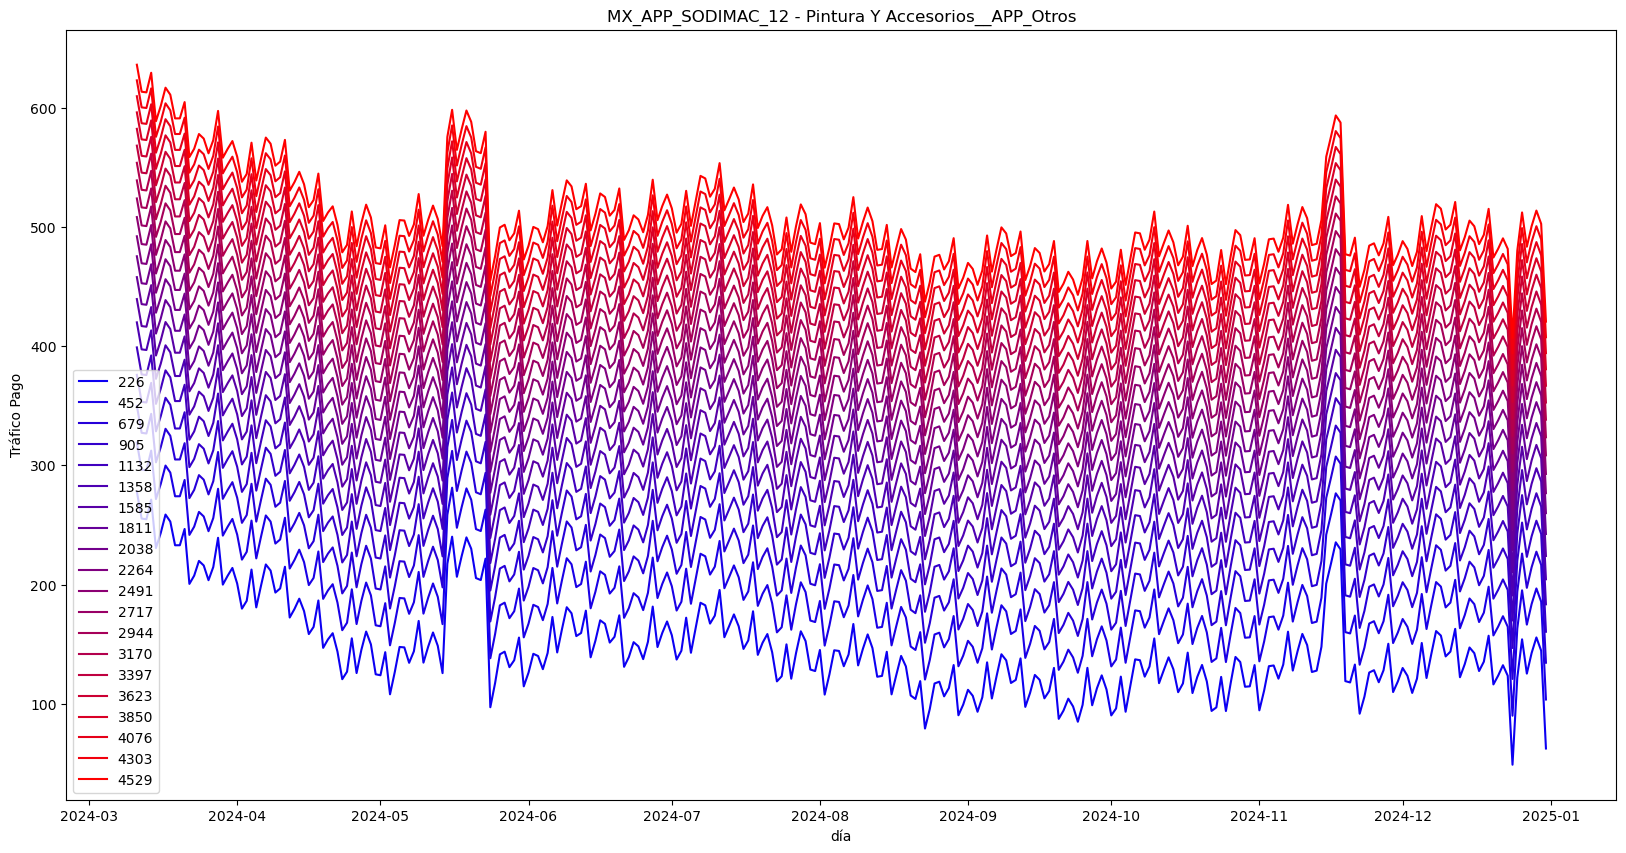

In [17]:
for name in archivos:
    forecast = tf.pickle_act(f'{carpeta_resultados}Inversion/F-LT/pickles/proceso_predict/0_all_forecast/240229_2024_libre/{name}')
    
    print(f'{carpeta_resultados}Inversion/F-LT/pickles/proceso_predict/0_all_forecast/240229_2024_libre/{name}')

    forecast = forecast[forecast['y'].isna()][['ds', 'yhat1', 'RANGO', 'INVERSION']]
    # Grafica ds vs yhat1 donde cada linea sea un rango

    forecast['ds'] = pd.to_datetime(forecast['ds'])
    forecast = forecast.sort_values('ds').reset_index(drop = True)
    #forecast = forecast.sort_values('RANGO').reset_index(drop = True)

    lista_inv = forecast['INVERSION'].unique()
    lista_inv.sort()
    lista_inv

    # Quiero que los colores, sean una combinacion lineal de azul y rojo donde un rango/20 sea amarillo y un (1-rango)/20 sea verde
    plt.figure(figsize = (20, 10))
    rango = 1
    for inversion in lista_inv:
        
        df_rango = forecast[forecast['INVERSION'] == inversion].reset_index(drop = True)
        #inversion = int(df_rango['INVERSION'].iloc[0])
        #print(rango, inversion)
        # color entre amarillo y verde
        
        color = (rango/len(forecast['RANGO'].unique()), 0, 1 - rango/len(forecast['RANGO'].unique()))
        # quiero que cada linea tenga una etiqueta
        plt.plot(df_rango['ds'], df_rango['yhat1'], label = int(inversion), color = color)
        
        rango += 1
        
    # Obtiene handles y etiquetas
    handles, labels = plt.gca().get_legend_handles_labels()

    # Ordena ambos por el valor final de cada línea (de menor a mayor)
    handles_labels = sorted(zip(handles, labels), key=lambda hl: hl[0].get_ydata()[-1])

    # Desempaqueta los handles y etiquetas ordenados
    handles, labels = zip(*handles_labels)

    plt.title(name)
    # Crea la leyenda con los handles y etiquetas ordenados

    # Titulo eje y
    plt.ylabel('Tráfico Pago')
    plt.xlabel('día')
    plt.legend(handles, labels)
    plt.show()


Ineficiente

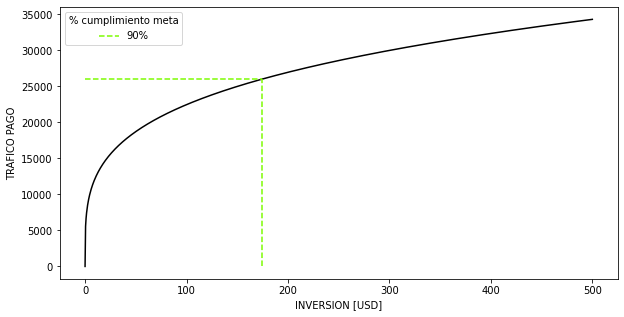

In [63]:
# ln
x_vect = np.linspace(0, 500, 1000)

puntos = [[150, 25000], [300, 30000]] # Dos puntos, además del 0,0 por los que pasa la curva

def y(A, n, h, x):
    return A * (x ** n) + h

n = np.log(puntos[1][1] / puntos[0][1]) / np.log(puntos[1][0] / puntos[0][0])
A = puntos[0][1] / (puntos[0][0] ** n)
h = 0
y_vect = y(A, n, h, x_vect)


plt.figure(figsize = (10, 5))
plt.plot(x_vect, y_vect, color = 'black')

"""
x0 = 300
y0 = y(A, n, h, x0)

# grafica una linea punteada negra ente el (10, 0) y el (10,  250)
plt.plot([x0, x0], [0, y0], color = 'salmon', linestyle = '--')
plt.plot([0, x0], [y0, y0], color = 'salmon', linestyle = '--', label = '100%')


x0 = 230.78499
y0 = y(A, n, h, x0)

plt.plot([x0, x0], [0, y0], color = 'goldenrod', linestyle = '--')
plt.plot([0, x0], [y0, y0], color = 'goldenrod', linestyle = '--', label = '95%')

"""
x0 = 174.11987
y0 = y(A, n, h, x0)

plt.plot([x0, x0], [0, y0], color = 'lawngreen', linestyle = '--')
plt.plot([0, x0], [y0, y0], color = 'lawngreen', linestyle = '--', label = '90%')
"""
x0 = 128.43705
y0 = y(A, n, h, x0)

plt.plot([x0, x0], [0, y0], color = 'seagreen', linestyle = '--')
plt.plot([0, x0], [y0, y0], color = 'seagreen', linestyle = '--', label = '85%')
"""

plt.xlabel('INVERSION [USD]')
plt.ylabel('TRAFICO PAGO')

# agregar numeros en los puntos
#for i in range(len(forecast2)):
#    plt.text(forecast2['INVERSION'][i], forecast2['VISITAS_PAGO'][i], str(int(forecast2['VISITAS_PAGO'][i])))
plt.legend(title = "% cumplimiento meta")
plt.show()

Eficiente

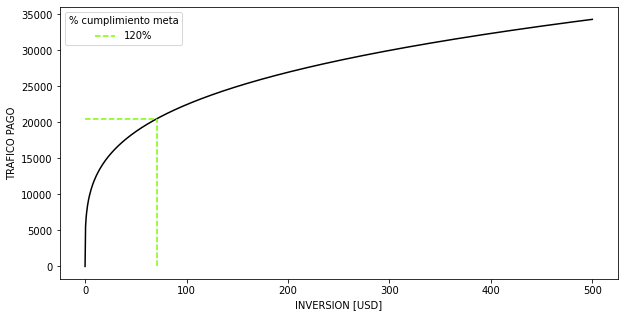

In [66]:
# ln
x_vect = np.linspace(0, 500, 1000)

puntos = [[150, 25000], [300, 30000]] # Dos puntos, además del 0,0 por los que pasa la curva

def y(A, n, h, x):
    return A * (x ** n) + h

n = np.log(puntos[1][1] / puntos[0][1]) / np.log(puntos[1][0] / puntos[0][0])
A = puntos[0][1] / (puntos[0][0] ** n)
h = 0
y_vect = y(A, n, h, x_vect)


plt.figure(figsize = (10, 5))
plt.plot(x_vect, y_vect, color = 'black')

"""
x0 = 26.42
y0 = y(A, n, h, x0)

# grafica una linea punteada negra ente el (10, 0) y el (10,  250)
plt.plot([x0, x0], [0, y0], color = 'salmon', linestyle = '--')
plt.plot([0, x0], [y0, y0], color = 'salmon', linestyle = '--', label = '100%')


x0 = 44.56
y0 = y(A, n, h, x0)

plt.plot([x0, x0], [0, y0], color = 'goldenrod', linestyle = '--')
plt.plot([0, x0], [y0, y0], color = 'goldenrod', linestyle = '--', label = '110%')
"""
x0 = 70.54
y0 = y(A, n, h, x0)

plt.plot([x0, x0], [0, y0], color = 'lawngreen', linestyle = '--')
plt.plot([0, x0], [y0, y0], color = 'lawngreen', linestyle = '--', label = '120%')
"""
x0 = 106.27
y0 = y(A, n, h, x0)

plt.plot([x0, x0], [0, y0], color = 'seagreen', linestyle = '--')
plt.plot([0, x0], [y0, y0], color = 'seagreen', linestyle = '--', label = '130%')
"""

plt.xlabel('INVERSION [USD]')
plt.ylabel('TRAFICO PAGO')

# agregar numeros en los puntos
#for i in range(len(forecast2)):
#    plt.text(forecast2['INVERSION'][i], forecast2['VISITAS_PAGO'][i], str(int(forecast2['VISITAS_PAGO'][i])))
plt.legend(title = "% cumplimiento meta")
plt.show()

General

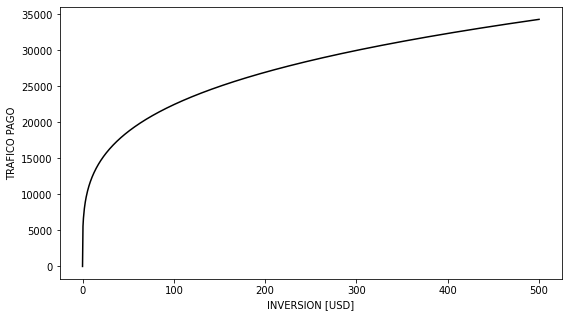

In [58]:
# ln
x_vect = np.linspace(0, 500, 1000)

puntos = [[150, 25000], [300, 30000]] # Dos puntos, además del 0,0 por los que pasa la curva

def y(A, n, h, x):
    return A * (x ** n) + h

n = np.log(puntos[1][1] / puntos[0][1]) / np.log(puntos[1][0] / puntos[0][0])
A = puntos[0][1] / (puntos[0][0] ** n)
h = 0
y_vect = y(A, n, h, x_vect)


plt.figure(figsize = (10, 5))
plt.plot(x_vect, y_vect, color = 'black')

plt.xlabel('INVERSION [USD]')
plt.ylabel('TRAFICO PAGO')

# agregar numeros en los puntos
#for i in range(len(forecast2)):
#    plt.text(forecast2['INVERSION'][i], forecast2['VISITAS_PAGO'][i], str(int(forecast2['VISITAS_PAGO'][i])))
#plt.legend(title = "% cumplimiento meta")
plt.show()

General

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
A, n, h,

(6691.956932508988, 0.2630344058337938, 0)

In [45]:
x_vect[0]

0.0

PINTAR LOS PUNTOS!!!
PINTAR LOS PUNTOS!!!
PINTAR LOS PUNTOS!!!
PINTAR LOS PUNTOS!!!


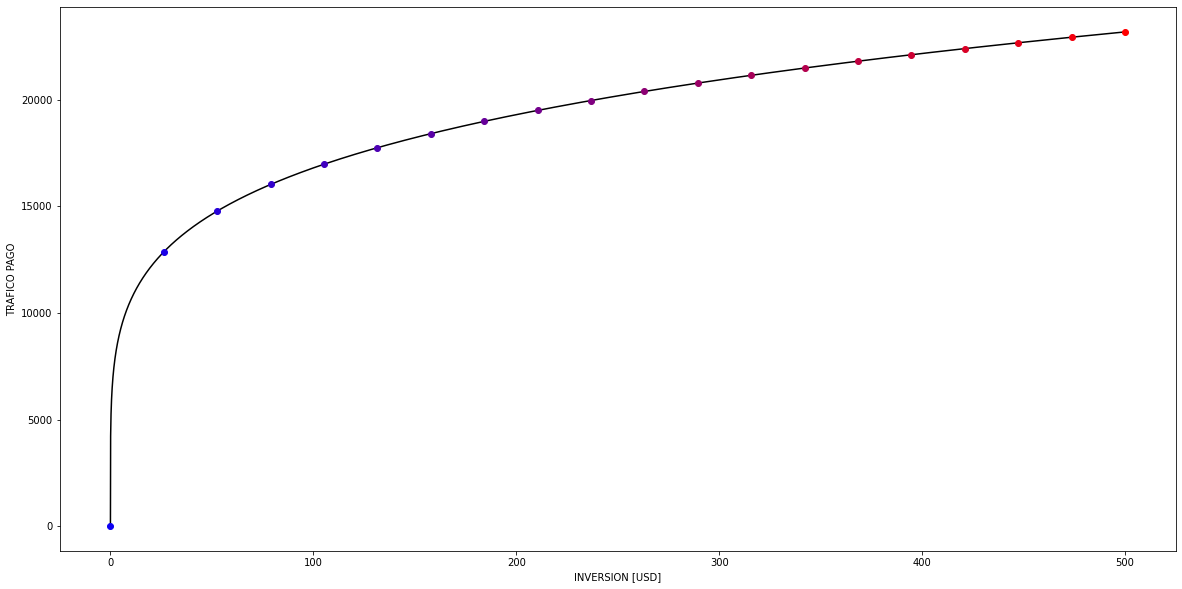

In [50]:
x_vect = np.linspace(0, 500, 20)
x_vect2 = np.linspace(0, 500, 10000)
puntos = [[150, 25000], [300, 30000]] # Dos puntos, además del 0,0 por los que pasa la curva

def y(A, n, h, x):
    return A * (x ** n) + h

def diff_y(A, n, h, x):
    return A * n * (x ** (n - 1))

n = np.log(puntos[1][1] / puntos[0][1]) / np.log(puntos[1][0] / puntos[0][0])
A = puntos[0][1] / (puntos[0][0] ** n)

n = 0.2
h = 0
y_vect = y(A, n, h, x_vect)
y_vect2 = y(A, n, h, x_vect2)
#diffy_vect = diff_y(A, n, h, x_vect)


plt.figure(figsize = (20, 10))
#plt.plot(x_vect, y_vect, 'o', color = 'black')
plt.plot(x_vect2, y_vect2, color = 'black')

#rango = 1
for rango in range(1, 21):
    
    #df_rango = forecast[forecast['INVERSION'] == inversion].reset_index(drop = True)
    #inversion = int(df_rango['INVERSION'].iloc[0])
    #print(rango, inversion)
    # color entre amarillo y verde
    
    color = ((rango / 20), 0, 1 - rango / 20)
    # quiero que cada linea tenga una etiqueta
    plt.plot(x_vect[rango - 1], y_vect[rango - 1],  'o', color = color)
        

plt.xlabel('INVERSION [USD]')
plt.ylabel('TRAFICO PAGO')

# No mostrar n+úmers en los ejes (pero si los labels)
#plt.xticks([])
#plt.yticks([])

plt.show()

In [44]:
y(A, n, h, 20)

300.0

In [69]:
A, n, h

(6691.956932508988, 0.2630344058337938, 0)

,INVERSION,VISITAS_PAGO
0,0,0
1,226,145
2,452,186
3,679,217
4,905,243
5,1132,266
6,1358,287
7,1585,306
8,1811,324
9,2038,342


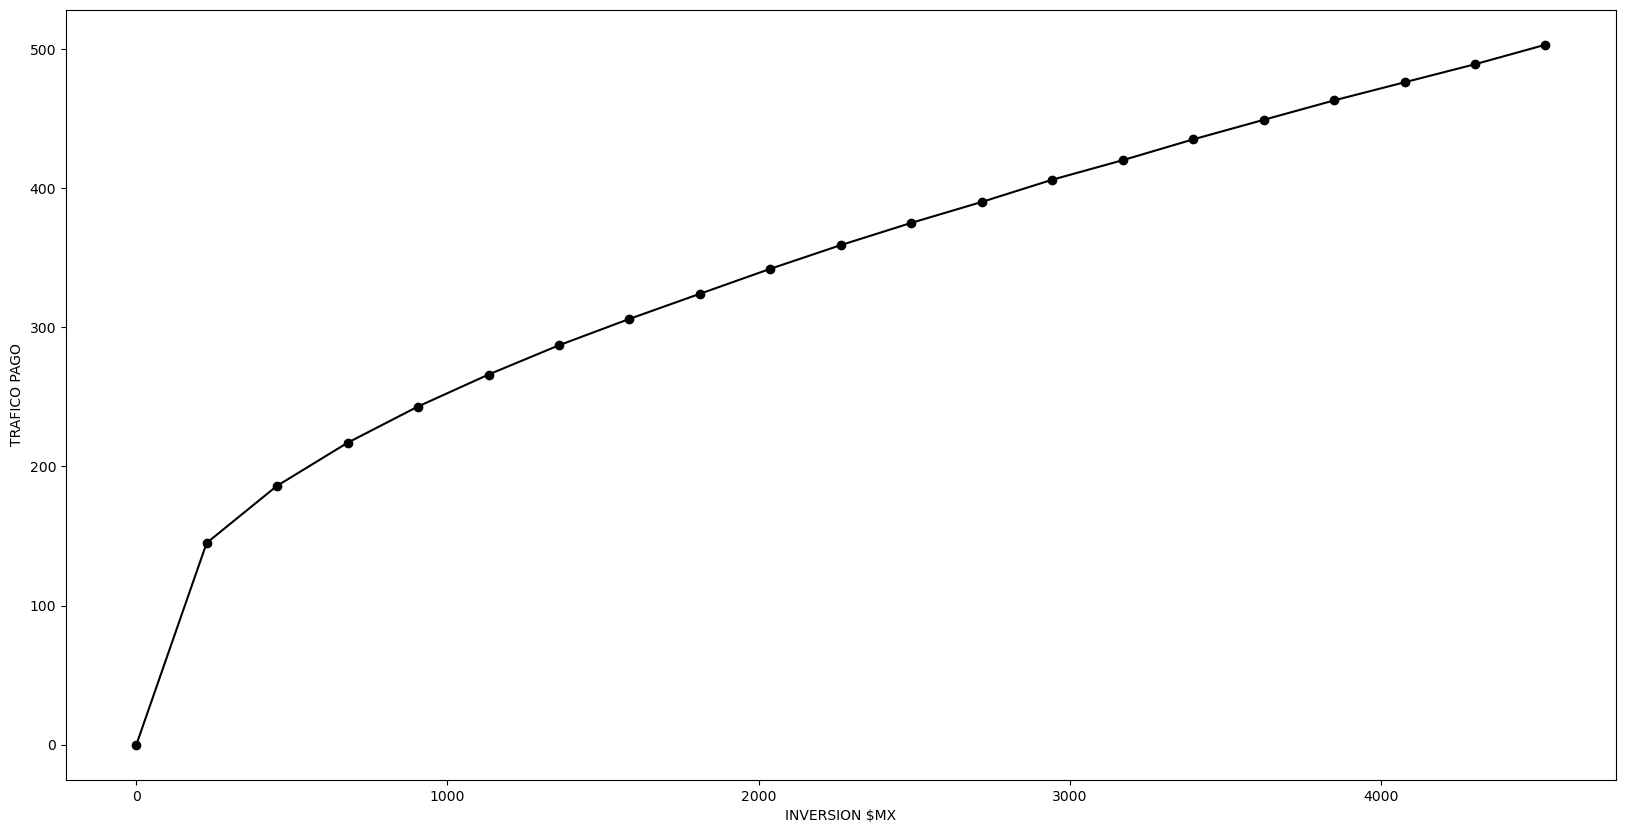

In [20]:
forecast2 = forecast[forecast['ds'] == '2024-08-01'][['yhat1', 'INVERSION']]
forecast2 = pd.concat([forecast2, pd.DataFrame({'yhat1': [0], 'INVERSION': [0]})])
forecast2 = forecast2.sort_values(by = 'INVERSION').reset_index(drop  = True)
forecast2 = forecast2.rename(columns = {'yhat1': 'VISITAS_PAGO'})[['INVERSION', 'VISITAS_PAGO']]
forecast2[['INVERSION', 'VISITAS_PAGO']] = forecast2[['INVERSION', 'VISITAS_PAGO']].astype(int)
forecast2['DELTA_VISITAS'] = forecast2['VISITAS_PAGO'] - forecast2['VISITAS_PAGO'].shift(1)
display(forecast2[['INVERSION', 'VISITAS_PAGO']])
# graficar
plt.figure(figsize = (20, 10))
plt.plot(forecast2['INVERSION'], forecast2['VISITAS_PAGO'], color = 'black')
plt.plot(forecast2['INVERSION'], forecast2['VISITAS_PAGO'], 'o', color = 'black')
plt.xlabel('INVERSION $MX')
plt.ylabel('TRAFICO PAGO')
# agregar numeros en los puntos
#for i in range(len(forecast2)):
#    plt.text(forecast2['INVERSION'][i], forecast2['VISITAS_PAGO'][i], str(int(forecast2['VISITAS_PAGO'][i])))

plt.show()

In [ ]:
prophet_min_iteraciones_inversion
print('Salida')

# Otros 2

In [ ]:
df_model = pd.read_csv('df_model_revision.csv', sep = ';', decimal = ',')
df_model

In [ ]:
train_df = pd.read_csv('train_df.csv', sep = ';', decimal = ',')
test_df = pd.read_csv('test_df.csv', sep = ';', decimal = ',')
type(train_df['ds'][0])

In [ ]:
train_df

In [ ]:
train_df.info()

In [ ]:
train_df['ds'] = pd.to_datetime(train_df['ds']).dt.date
type(train_df['ds'][0])

In [ ]:
train_df['ds'].unique()

In [ ]:
df_model.ds.unique()

In [ ]:
sys.exit()

# Otros

In [ ]:
df_test_results = pd.read_csv('df_test_results.csv', sep = ';', decimal = ',')
df_test_results

In [ ]:
df_future = pd.read_csv('INVdf_future.csv', sep = ';', decimal = ',')
df_future

In [ ]:
df_model_0 = pd.read_csv('INVdf_model_0.csv', sep = ';', decimal = ',')
df_model_0

In [ ]:
# mostrar los ds duplicados en df_model_0
df_future[df_future['ds'].duplicated()]

In [ ]:
dia_predecir_hasta

In [ ]:
dt.datetime(2024,3,10).date() + dt.timedelta(days = 297)

In [ ]:
297